# <font style="color: blue; ">  Analytical construction of soliton eigenstates </font>

In [1]:
import numpy as np
import time
#from scipy.integrate import odeint
from scipy import linalg
from scipy import special
from scipy import optimize
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
from matplotlib.backends.backend_pdf import PdfPages 

## <font style="color: red; ">  Definitions and setup

### Potential (Fig. 1)

In [2]:
def V_pot(alpha,ell,x):
    if abs(x)<0.001:
        return ell*(ell+1)/x**2 - alpha*(1-x/2.+x**2/3.)
    else:
        return ell*(ell+1)/x**2 -alpha*np.log(1+x)/x

def func_f_cvir(cvir):
    return 1./cvir/(np.log(1+cvir)-cvir/(1+cvir))

def func_g_cvir(cvir):
    return (np.log(1+cvir)-cvir/(1+cvir))/cvir

In [3]:
### Finding element at which the 1D data is below the thresold

def find_xcut(data, y_threshold):   # search from outer part
    i = 0
    ii = 1
    n_stop = len(data)
    while(i <=0):
        value = data[len(data) - ii]
        if(abs(value) > y_threshold):
            n_stop = len(data) - ii
            i+= 1
#        print(value)
        ii+= 1
    return n_stop

def find_xcut2(data, y_threshold):  # search from inner part
    i = 0
    ii = 0
    n_stop = len(data)
    while(i <=0):
        value = data[ii]
        if(abs(value) > y_threshold):
            n_stop = ii
            i+= 1
#        print(value)
        ii+= 1
    return n_stop  

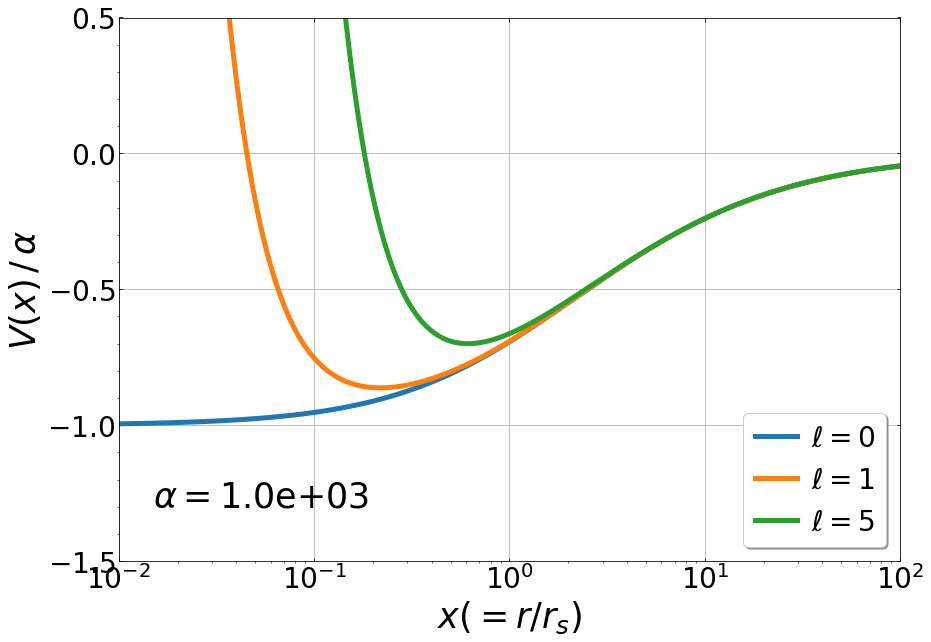

In [5]:
alpha=1.e3

xmin=0.01
xmax=100.
nmax=1000
xx = np.logspace(np.log10(xmin), np.log10(xmax), nmax)
baseline = np.zeros(nmax)

c_vir=7

r_vir = np.repeat(c_vir, nmax)

ymin=-1.5e0
ymax=0.5e0
yy = np.logspace(np.log10(xmin), np.log10(xmax), nmax)
vertical = np.linspace(ymin,ymax,nmax)

v_potential     = np.vectorize(V_pot)

plt.rcParams["font.size"] = 28
fig=plt.figure(figsize=(14,10))
gs = gridspec.GridSpec(1,1,wspace=0.0,hspace=0.0)


ax = plt.subplot(gs[0,0])
ax.set_xscale('log')
ax.set_yscale('linear')
ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
#ax.set_xticks(np.arange(xmin, xmax+0.01, 2))
ax.set_yticks(np.arange(ymin, ymax+0.1, (ymax-ymin)/4))
ax.set_xlabel('$x(=r/r_s)$',fontsize=35)
ax.set_ylabel('$V(x)\\,/\\,\\alpha$',fontsize=35)
ax.plot(xx,   v_potential(alpha,0,xx)/alpha, ls='-', lw=5, color='tab:blue', label='$\ell=0$')
ax.plot(xx,   v_potential(alpha,1,xx)/alpha, ls='-', lw=5, color='tab:orange', label='$\ell=1$')
ax.plot(xx,   v_potential(alpha,5,xx)/alpha, ls='-', lw=5, color='tab:green', label='$\ell=5$')
ax.text(0.015, ymin+0.1*(ymax-ymin), "$\\alpha=$%2.1e"%alpha, color='black', fontsize=35)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.grid()
ax.minorticks_on()
ax.legend(shadow=True,loc='lower right',fontsize=28,handletextpad=0.5,handlelength= 1.5, borderaxespad=0.5)
plt.show()

## Output to PDF file
# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/potential.pdf')
# pp.savefig(fig)
# pp.close()

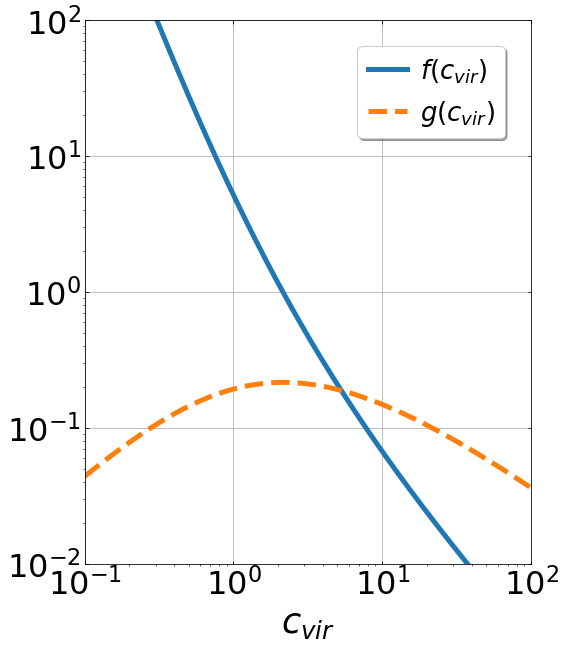

In [6]:
xmin=0.1
xmax=100.
nmax=300
xx = np.logspace(np.log10(xmin), np.log10(xmax), nmax)

ymin=0.01
ymax=100

v_potential     = np.vectorize(V_pot)

baseline = np.zeros(xx.shape[0])

plt.rcParams["font.size"] = 32
fig=plt.figure(figsize=(8,10))
gs = gridspec.GridSpec(1,1,wspace=0.0,hspace=0.0)


ax = plt.subplot(gs[0,0])
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
#ax.set_xticks(np.arange(0, xmax+0.01, 2))
#ax.set_yticks(np.arange(ymin, ymax+0.1, (ymax-ymin)/4))
ax.set_xlabel('$c_{vir}$',fontsize=35)
#ax.set_ylabel('$f(c_{vir})$',fontsize=30)
ax.plot(xx,   func_f_cvir(xx), ls='-', lw=5,label='$f(c_{vir})$')
ax.plot(xx,   func_g_cvir(xx), ls='--', lw=5,label='$g(c_{vir})$')
#ax.plot(xx,   np.sqrt(func_g_cvir(xx)), ls='--', lw=5,label='$g(c_{vir})^{1/2}$')
# ax.plot(xx,   v_potential(1,1,xx), ls='-', lw=5)
# ax.plot(xx,   baseline, ls=':', lw=2, color='black')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.grid()
ax.minorticks_on()
ax.legend(shadow=True,loc='upper right',fontsize=26,handletextpad=0.5,handlelength= 1.5, borderaxespad=1)


plt.show()

## Output to PDF file
# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/func_cvir.pdf')
# pp.savefig(fig)
# pp.close()

### Analytical results for eigenvalues & eigenfunctions ($\ell=0$)

In [4]:
def ffint(eps):
    g= lambda x: np.log(1+x)/x + eps
    if  eps > -0.2:
        xmax = 10000000
    else:
        xmax = 1000000
        eps1 = -0.1
    sol = optimize.brentq(g, 0.00000001, xmax, maxiter=500)
    return integrate.quad(lambda x: np.sqrt(g(x)), 0, sol, limit=500)[0]


# def ffint(eps):    # old version #
#     g= lambda x: np.log(1+x)/x + eps
#     sol = optimize.brentq(g, 0.0001, 200)
#     return integrate.quad(lambda x: np.sqrt(g(x)), 0, sol)[0]

find_int = np.vectorize(ffint)

In [5]:
# A more rigorous estimation of eigenvalue normalized by alpha

def wave_func_at_zero(alpha,eps): 
    z_zero = -alpha**(1./3.)*(1.5*ffint(eps))**(2./3.)
#    sol = optimize.brentq(special.airy(z_zero)[0], -0.999, -0.3)
    return special.airy(z_zero)[0]

def solve_eigenvalue1(alpha, epsmin, epsmax): 
    hh = lambda eps: wave_func_at_zero(alpha, eps)
    sol = optimize.brentq(hh, epsmin, epsmax)
    return sol

def get_eigenvalues(alpha, nmax, eps_init):
    evalues=np.zeros(nmax)
    i=0
    eps1 = eps_init
    if  alpha<1e-4:
        delta_eps = 0.00025
        eps1 = -0.1
    elif  alpha>=1.e-4 and alpha<1.e-3:
        delta_eps = 0.001
        eps1 = -0.2
    elif  alpha >= 1.e-3 and alpha<1:
        delta_eps = 0.01
        eps1 = -0.9
    elif alpha >= 1e6 and alpha<1e8:
        delta_eps = 0.002
        eps1 = -0.99999
    elif alpha >= 1e8 and alpha < 1e10:
        delta_eps = 0.0005
        eps1 = -0.99999
    elif alpha >= 1e10 and alpha < 1e12:
        delta_eps = 0.0001
        eps1 = -0.99999
    elif alpha >= 1e12 and alpha < 1e15:
        delta_eps = 0.00001
        eps1 = -0.99999
    elif alpha >= 1e15 and alpha < 1e17:
        delta_eps = 0.000001
        eps1 = -0.9999999
    elif alpha >= 1e17 and alpha <= 1e20:
        delta_eps = 0.0000001
        eps1 = -0.9999999
    else:
        delta_eps = 0.01
        
    wf1 = wave_func_at_zero(alpha, eps1) 
    while(i < nmax):
        eps2 = eps1 + delta_eps
        wf2 = wave_func_at_zero(alpha, eps2)
        if wf1*wf2<0.:
            evalues[i]=solve_eigenvalue1(alpha, eps1, eps2)
            i+=1
        eps1 = eps2
        wf1 = wf2
    return evalues

def norm_ell_zero(alpha, eps):
    if alpha <= 2.:
        xmin = 1.e-2
        xmax = 1.e3        
    elif 2. < alpha <= 1.e3:
        xmin = 1.e-4
        xmax = 5.e1
    elif 1.e3 < alpha <= 1.e6:
        xmin = 1.e-5
        xmax = 1.
    elif 1.e6 < alpha <=1.e10:
        xmin = 1.e-6
        xmax = 1.e-1
    elif 1.e10 < alpha:
        xmin = 1.e-7
        xmax = 1.e-2        
    norm2 = integrate.quad(lambda y: eigen_function(alpha,eps,y)**2, xmin, xmax)
    return np.sqrt(norm2[0])

wf_at_zero = np.vectorize(wave_func_at_zero)

In [6]:
def z_function(alpha,eps,x):
    g= lambda x: np.log(1+x)/x + eps
    if  eps > -0.2:
        xmax = 10000000
    else:
        xmax = 1000000
        eps1 = -0.1
    x_c = optimize.brentq(g, 0.00000001, xmax, maxiter=500)
    if x>x_c:
        z =   alpha**(1./3.)*(1.5*integrate.quad(lambda y: np.sqrt(-g(y)), x_c, x)[0])**(2./3.)
    elif x<=x_c:
        z = - alpha**(1./3.)*(1.5*integrate.quad(lambda y: np.sqrt( g(y)), x, x_c)[0])**(2./3.)
    return z


def eigen_function(alpha,eps,x):
    g= lambda x: np.log(1+x)/x + eps
    if  eps > -0.2:
        xmax = 10000000
    else:
        xmax = 1000000
        eps1 = -0.1
    x_c = optimize.brentq(g, 0.00000001, xmax, maxiter=500)
    if x>x_c:
        z =   alpha**(1./3.)*(1.5*integrate.quad(lambda y: np.sqrt(-g(y)), x_c, x)[0])**(2./3.)
        wave_func = z**(1./4.)/(-g(x))**(1./4.) * special.airy(z)[0]
    elif x<=x_c:
        z = - alpha**(1./3.)*(1.5*integrate.quad(lambda y: np.sqrt( g(y)), x, x_c)[0])**(2./3.)
        wave_func = (-z)**(1./4.)/(g(x))**(1./4.) * special.airy(z)[0]
    return wave_func

z_func     = np.vectorize(z_function)
eigen_func = np.vectorize(eigen_function)

### Analytical results of eigenvalues & eigenfunctions ($\ell\ne0$)

In [10]:
def g_ell(alpha, ell, eps, x):
    return - ell*(ell+1)/alpha/x**2 + np.log(1+x)/x + eps

def get_extremum(alpha, ell):
    g_ell_deriv = lambda x: 2.* ell*(ell+1)/alpha/x**3 - np.log(1+x)/x**2 + 1./(1+x)/x
    x_ext = optimize.brentq(g_ell_deriv, 0.0001, 1000)
    return x_ext

def get_turning_points(alpha, ell, eps):
    g_ell = lambda x: - ell*(ell+1)/alpha/x**2 + np.log(1+x)/x + eps
    x_ext = get_extremum(alpha, ell)
    x1 = optimize.brentq(g_ell, 0.001, x_ext)
    x2 = optimize.brentq(g_ell, x_ext, 1000)
    return np.array([x1,x2])

def get_beta(alpha, ell, eps):
    g_ell = lambda x: - ell*(ell+1)/alpha/x**2 + np.log(1+x)/x + eps
    x_tp  = get_turning_points(alpha, ell, eps)
    integ = integrate.quad(lambda x: np.sqrt(g_ell(x)), x_tp[0], x_tp[1])[0]
    return np.sqrt(2. / np.pi * integ)

def p_function(alpha, ell, eps, x):
    g_ell = lambda y: - ell*(ell+1)/alpha/y**2 + np.log(1+y)/y + eps
    beta  = get_beta(alpha, ell, eps)
    x_tp  = get_turning_points(alpha, ell, eps)
    if x<x_tp[0]:
        integ = integrate.quad(lambda y: np.sqrt(-g_ell(y)), x, x_tp[0])[0]
        p1 = lambda p: -1/2 * ( beta**2 * np.arccosh(-p/beta) + p * np.sqrt(p*p-beta**2) ) - integ
        p_value = optimize.brentq(p1, -1000, -beta)
    elif x>x_tp[1]:
        integ = integrate.quad(lambda y: np.sqrt(-g_ell(y)), x_tp[1],x)[0]
        p3 = lambda p: -1/2 * ( beta**2 * np.arccosh(p/beta)  - p * np.sqrt(p*p-beta**2) ) - integ
        p_value = optimize.brentq(p3, beta, 1000)
    else:
        integ = integrate.quad(lambda y: np.sqrt(g_ell(y)), x_tp[0],x)[0]
        p2 = lambda p:  1/2 * ( beta**2 * np.arccos(-p/beta)  + p * np.sqrt(beta**2-p*p) ) - integ
        p_value = optimize.brentq(p2, -beta, beta)
    return p_value

p_func = np.vectorize(p_function)

In [11]:
import mpmath as mp
from mpmath import *
mp.dps = 50; mp.pretty = True
pcd=np.vectorize(pcfd)
pcu=np.vectorize(pcfu)

In [12]:
print(mp)

Mpmath settings:
  mp.prec = 169               [default: 53]
  mp.dps = 50                 [default: 15]
  mp.trap_complex = False     [default: False]


In [48]:
def get_pcfu_at_origin(alpha, ell, eps):
    mp.dps = 20
    beta  = get_beta(alpha, ell, eps)
    zz    = np.sqrt(2.*np.sqrt(alpha)) * p_function(alpha, ell, eps, 0.00001)
    aa    = - np.sqrt(alpha) * beta**2 / 2.
    return pcfu(aa,zz)

get_parabolic_cylinder_at_origin = np.vectorize(get_pcfu_at_origin)

# def find_eigenvalue_non_zero_ell(alpha, ell, epsmin, epsmax): 
#     hh = lambda eps: get_wave_function_non_zero_ell_at_origin(alpha, ell, eps)
#     sol = optimize.brentq(hh, epsmin, epsmax)
#     return sol

def find_eigenvalue_non_zero_ell(alpha, ell, epsmin, epsmax): 
    mp.dps = 20
    hh = lambda eps: get_pcfu_at_origin(alpha, ell, eps)
    sol = findroot(hh, (epsmin, epsmax), solver='anderson',verify=False)
    return sol
## Note--. findroot in sympy is more accurate than brentq in scipy, but it takes longer time

def get_eigenvalue_non_zero_ell(alpha, nmax, ell, eps_init):  # finding a set of eigenvalues automatically
    mp.dps = 20
    evalues=np.zeros(nmax)
    i=0
    eps1 = eps_init
    delta_eps = 1.e-2
    
    wf1 = get_pcfu_at_origin(alpha, ell, eps1) 
    while(i < nmax):
        eps2 = eps1 + delta_eps
        wf2 = get_pcfu_at_origin(alpha, ell, eps2)
        if wf1*wf2<0.:
            evalues[i]=find_eigenvalue_non_zero_ell(alpha, ell, eps1, eps2)
            i+=1
        eps1 = eps2
        wf1 = wf2
    return evalues

def eigen_function_non_zero_ell(alpha, ell, eps, beta, x_crit, x):
    mp.dps = 20
    aa    = - np.sqrt(alpha) * beta**2 / 2.
    if x < x_crit:
        zz0    = p_func(alpha, ell, eps, x_crit)
        ff0    = abs(beta*beta - zz0*zz0)/ abs(g_ell(alpha, ell, eps, x_crit))   
        eigenfunc0 = ff0**0.25 * pcfu(aa, np.sqrt(2.*np.sqrt(alpha)) * zz0)
        slope = np.sqrt(ell*(ell+1)) + 0.5
        eigenfunc = (x/x_crit)**slope * eigenfunc0   # WKB approx. at an inner asymptotic region
    else:
        zz    = p_func(alpha, ell, eps, x)
        ff    = abs(beta*beta - zz*zz)/ abs(g_ell(alpha, ell, eps, x))    
        eigenfunc = ff**0.25 * pcfu(aa, np.sqrt(2.*np.sqrt(alpha)) * zz)   # A more rigorous analytic expression with pcfu
    return eigenfunc    
    
## Caution: eigenvalue eps has to be given correctly.

eigen_func_non_zero_ell = np.vectorize(eigen_function_non_zero_ell)

def norm_non_zero_ell(alpha, ell, eps, x_crit):
    beta = get_beta(alpha, ell, eps)
    xmin = 1.e-4
    xmax = 1.e1
    norm2 = integrate.quad(lambda y: eigen_function_non_zero_ell(alpha, ell, eps, beta, x_crit, y)**2, xmin, xmax)
    return np.sqrt(norm2[0])


## <font style="color: red; ">  Results (1): $\ell=0$ 

### Sovling eigenvalue problem numerically: $\alpha=10$, $10^2$, $10^3$

In [36]:
# start = time.time()

ell    = 0

start = time.time()

########
alpha1= 10
xmin1 = 0
xmax1 = 50.0
n1    = 10000  # Number of intervals

delta1= (xmax1-xmin1)/n1
dim1  = n1 - 1 # Number of internal points
x1    = np.linspace(xmin1+delta1, xmax1-delta1, dim1)
h1    = np.zeros((dim1,dim1),float)

# Construct Hamiltonian
for i in range(len(h1)-1):
        h1[i,i+1] = h1[i+1,i] = -1/delta1**2
for i in range(len(h1)):
        h1[i,i] = 2./delta1**2 + V_pot(alpha1, ell, x1[i])

# Solve
vals_alpha1, vecs_alpha1 = linalg.eigh(h1) #Note: eigenvectors in columns of vecs

########
alpha2 = 100
xmin2  = 0
#xmax2 = 10.0
xmax2  = 20.0
n2     = 10000  # Number of intervals

delta2= (xmax2-xmin2)/n2
dim2  = n2 - 1 # Number of internal points
x2    = np.linspace(xmin2+delta2, xmax2-delta2, dim2)
h2    = np.zeros((dim2,dim2),float)

# Construct Hamiltonian
for i in range(len(h2)-1):
        h2[i,i+1] = h2[i+1,i] = -1/delta2**2
for i in range(len(h2)):
        h2[i,i] = 2./delta2**2 + V_pot(alpha2, ell, x2[i])

# Solve
vals_alpha2, vecs_alpha2 = linalg.eigh(h2) #Note: eigenvectors in columns of vecs

########
alpha3 = 1000
xmin3 = 0
#xmax3 = 5.0
xmax3 = 20.0
n3    = 10000  # Number of intervals

delta3= (xmax3-xmin3)/n3
dim3  = n3 - 1 # Number of internal points
x3    = np.linspace(xmin3+delta3, xmax3-delta3, dim3)
h3    = np.zeros((dim3,dim3),float)

# Construct Hamiltonian
for i in range(len(h3)-1):
        h3[i,i+1] = h3[i+1,i] = -1/delta3**2
for i in range(len(h3)):
        h3[i,i] = 2./delta3**2 + V_pot(alpha3, ell, x3[i])


# Solve
vals_alpha3, vecs_alpha3 = linalg.eigh(h3) #Note: eigenvectors in columns of vecs

print("{:f}".format((time.time() - start)/60.0)+" min")

4.625317 min


In [39]:
#### Eigenvalues for n=1--5: analytical
nn = 5
E_list1 = get_eigenvalues(alpha1, nn, -0.999)
E_list2 = get_eigenvalues(alpha2, nn, -0.999)
E_list3 = get_eigenvalues(alpha3, nn, -0.999)
eps1        = np.zeros(nn)
eps2        = np.zeros(nn)
eps3        = np.zeros(nn)
norm_eigen1 = np.zeros(nn)
norm_eigen2 = np.zeros(nn)
norm_eigen3 = np.zeros(nn)
for i in range(nn):
    eps1[i]        = E_list1[i]
    eps2[i]        = E_list2[i]
    eps3[i]        = E_list3[i]
    norm_eigen1[i] = norm_ell_zero(alpha1, E_list1[i])
    norm_eigen2[i] = norm_ell_zero(alpha2, E_list2[i])
    norm_eigen3[i] = norm_ell_zero(alpha3, E_list3[i])
    print(eps1[i], eps2[i], eps3[i])

-0.5493498172977608 -0.7426254037725327 -0.8668713797647333
-0.3820486857325339 -0.6080486171923963 -0.7832298829580567
-0.2948972957056003 -0.5225714668824272 -0.7231093944362518
-0.23992650155582101 -0.4607551438695178 -0.6753451590523979
-0.201750415469653 -0.4130855926874365 -0.6355563804454603


In [40]:
#### Eigenvalues for n=1--5: numerical
norm_num1 = np.zeros(nn)
norm_num2 = np.zeros(nn)
norm_num3 = np.zeros(nn)
for i in range(nn):
    norm_num1[i] = np.sqrt(integrate.simps(np.transpose(vecs_alpha1)[i]**2,x1))
    norm_num2[i] = np.sqrt(integrate.simps(np.transpose(vecs_alpha2)[i]**2,x2))
    norm_num3[i] = np.sqrt(integrate.simps(np.transpose(vecs_alpha3)[i]**2,x3))

    print(vals_alpha1[i]/alpha1, vals_alpha2[i]/alpha2, vals_alpha3[i]/alpha3)

-0.5470530675318648 -0.7421500225740856 -0.8668027048291638
-0.38099869385624185 -0.6077507807327754 -0.7831779399067998
-0.29428249900841397 -0.5223601352990874 -0.7230681323431086
-0.2395204425822471 -0.4605952134811036 -0.675311587069635
-0.2014617933905948 -0.4129594681703429 -0.6355286772330683


In [41]:
#### Norm for n=1--5: analytical
for i in range(nn):
    print(norm_eigen1[i],norm_eigen2[i],norm_eigen3[i])

1.1210110909689133 0.7446250420620354 0.550101293762098
1.6692898433763115 0.9848146929207912 0.6775305278098809
2.168791046130907 1.1835216103881285 0.772991586383175
2.6505074713823937 1.364629360235105 0.8547670330235865
3.1243831620097975 1.5359245267438515 0.9287407306428792


In [42]:
#### Norm for n=1--5: numerical
for i in range(nn):
    print(norm_num1[i],norm_num2[i],norm_num3[i])

0.07071067562938178 0.04472135779989348 0.04472133643989526
0.07071067680868373 0.04472135832449787 0.04472134026485848
0.07071067728906638 0.04472135861443099 0.044721342826434855
0.07071067754152964 0.04472135880228435 0.044721344746771606
0.07071067769276732 0.04472135893425968 0.04472134626734852


### Figures 2, 3 & 5

#### Normalized eigenfunctions: Fig. 2

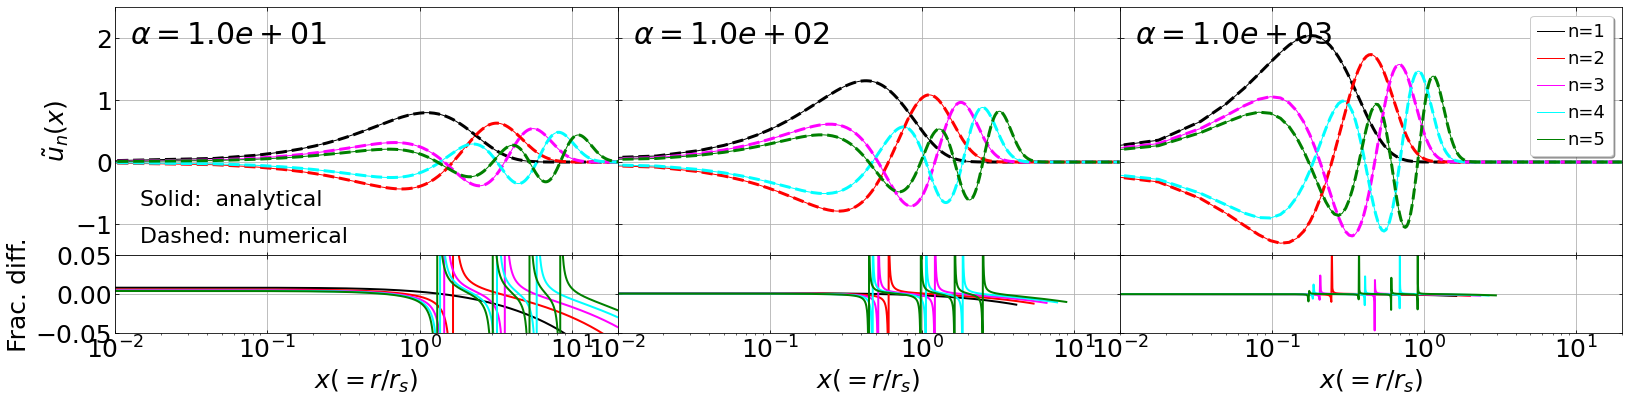

In [44]:
nmax = 200
xmin = 0.01
xmax = 20.
y1min   = -1.5
y1max   =  2.5
y2min   = -0.05
y2max   =  0.05

nskip = 8
y_threshold = 1e-7


plt.rcParams["font.size"] = 25
fig=plt.figure(figsize=(27,6))
gs = gridspec.GridSpec(2,3,wspace=0.0,hspace=0.0,height_ratios=[4, 1.25])

################################################################
########################## alpha = 10 ##########################
################################################################

ax = plt.subplot(gs[0,0])

ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=False,labelleft=True,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('linear')

##### Analytical
lw=1
ax.plot(x1[0::nskip], eigen_func(alpha1,eps1[0], x1[0::nskip])/norm_eigen1[0], 'black', lw=lw, label='n=1')
ax.plot(x1[0::nskip], eigen_func(alpha1,eps1[1], x1[0::nskip])/norm_eigen1[1], 'r', lw=lw, label='n=2')
ax.plot(x1[0::nskip], eigen_func(alpha1,eps1[2], x1[0::nskip])/norm_eigen1[2], 'magenta', lw=lw, label='n=3')
ax.plot(x1[0::nskip], eigen_func(alpha1,eps1[3], x1[0::nskip])/norm_eigen1[3], 'cyan', lw=lw, label='n=4')
ax.plot(x1[0::nskip], eigen_func(alpha1,eps1[4], x1[0::nskip])/norm_eigen1[4], 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha1
fact1 = ((eigen_func(alpha1,eps1[0], x1[0]))/norm_eigen1[0])
fact2 = ((eigen_func(alpha1,eps1[1], x1[0]))/norm_eigen1[1])
fact3 = ((eigen_func(alpha1,eps1[2], x1[0]))/norm_eigen1[2])
fact4 = ((eigen_func(alpha1,eps1[3], x1[0]))/norm_eigen1[3])
fact5 = ((eigen_func(alpha1,eps1[4], x1[0]))/norm_eigen1[4])

# ax.plot(x1[0::nskip], (np.transpose(saga_data)[0][0::nskip]/np.transpose(saga_data)[0][0]) * fact1, "--", lw=lw, color='black')
# ax.plot(x1[0::nskip], (np.transpose(saga_data)[1][0::nskip]/np.transpose(saga_data)[1][0]) * fact2, "--", lw=lw, color='r')
# ax.plot(x1[0::nskip], (np.transpose(saga_data)[2][0::nskip]/np.transpose(saga_data)[2][0]) * fact3, "--", lw=lw, color='magenta')
# ax.plot(x1[0::nskip], (np.transpose(saga_data)[3][0::nskip]/np.transpose(saga_data)[3][0]) * fact4, "--", lw=lw, color='cyan')
# ax.plot(x1[0::nskip], (np.transpose(saga_data)[4][0::nskip]/np.transpose(saga_data)[4][0]) * fact5, "--", lw=lw, color='green')

ax.plot(x1[0::nskip], np.transpose(saga_data)[0][0::nskip]/norm_num1[0], "--", lw=lw, color='black')
ax.plot(x1[0::nskip], np.transpose(saga_data)[1][0::nskip]/norm_num1[1], "--", lw=lw, color='r')
ax.plot(x1[0::nskip], np.transpose(saga_data)[2][0::nskip]/norm_num1[2], "--", lw=lw, color='magenta')
ax.plot(x1[0::nskip], np.transpose(saga_data)[3][0::nskip]/norm_num1[3], "--", lw=lw, color='cyan')
ax.plot(x1[0::nskip], np.transpose(saga_data)[4][0::nskip]/norm_num1[4], "--", lw=lw, color='green')

ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.85*(y1max-y1min), "$\\alpha=%2.1e$"%alpha1, fontsize=30)
ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.20*(y1max-y1min), "Solid:  analytical", fontsize=22)
ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.05*(y1max-y1min), "Dashed: numerical ", fontsize=22)

#ax.set_xlabel('$x(=r/r_s)$')
ax.set_ylabel('$\\tilde{u}_{n}(x)$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(y1min, y1max)
ax.grid()
#ax.legend(shadow=True,loc='upper left',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


bx = plt.subplot(gs[1,0])
bx.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
bx.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

bx.set_xscale('log')
bx.set_yscale('linear')

eigen_func_num1 = np.transpose(saga_data)[0]/norm_num1[0]
eigen_func_num2 = np.transpose(saga_data)[1]/norm_num1[1]
eigen_func_num3 = np.transpose(saga_data)[2]/norm_num1[2]
eigen_func_num4 = np.transpose(saga_data)[3]/norm_num1[3]
eigen_func_num5 = np.transpose(saga_data)[4]/norm_num1[4]

n_end1 = find_xcut(eigen_func_num1, y_threshold)
n_end2 = find_xcut(eigen_func_num2, y_threshold)
n_end3 = find_xcut(eigen_func_num3, y_threshold)
n_end4 = find_xcut(eigen_func_num4, y_threshold)
n_end5 = find_xcut(eigen_func_num5, y_threshold)

lw=2
bx.plot(x1[0:n_end1], (eigen_func(alpha1,eps1[0], x1[0:n_end1])/norm_eigen1[0]) / (eigen_func_num1[0:n_end1])-1, "-", lw=lw, color='black')
bx.plot(x1[0:n_end2], (eigen_func(alpha1,eps1[1], x1[0:n_end2])/norm_eigen1[1]) / (eigen_func_num2[0:n_end2])-1, "-", lw=lw, color='r')
bx.plot(x1[0:n_end3], (eigen_func(alpha1,eps1[2], x1[0:n_end3])/norm_eigen1[2]) / (eigen_func_num3[0:n_end3])-1, "-", lw=lw, color='magenta')
bx.plot(x1[0:n_end4], (eigen_func(alpha1,eps1[3], x1[0:n_end4])/norm_eigen1[3]) / (eigen_func_num4[0:n_end4])-1, "-", lw=lw, color='cyan')
bx.plot(x1[0:n_end5], (eigen_func(alpha1,eps1[4], x1[0:n_end5])/norm_eigen1[4]) / (eigen_func_num5[0:n_end5])-1, "-", lw=lw, color='green')

bx.set_xlabel('$x(=r/r_s)$')
bx.set_ylabel('Frac. diff.')
bx.set_xlim(xmin, xmax)
bx.set_ylim(y2min, y2max)

bx.grid()

################################################################
########################## alpha =1e2 ##########################
################################################################

ax = plt.subplot(gs[0,1])

ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('linear')

##### Analytical
lw=1
ax.plot(x2[0::nskip], eigen_func(alpha2,eps2[0], x2[0::nskip])/norm_eigen2[0], 'black', lw=lw, label='n=1')
ax.plot(x2[0::nskip], eigen_func(alpha2,eps2[1], x2[0::nskip])/norm_eigen2[1], 'r', lw=lw, label='n=2')
ax.plot(x2[0::nskip], eigen_func(alpha2,eps2[2], x2[0::nskip])/norm_eigen2[2], 'magenta', lw=lw, label='n=3')
ax.plot(x2[0::nskip], eigen_func(alpha2,eps2[3], x2[0::nskip])/norm_eigen2[3], 'cyan', lw=lw, label='n=4')
ax.plot(x2[0::nskip], eigen_func(alpha2,eps2[4], x2[0::nskip])/norm_eigen2[4], 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha2
fact1 = ((eigen_func(alpha2,eps2[0], x2[0]))/norm_eigen2[0])
fact2 = ((eigen_func(alpha2,eps2[1], x2[0]))/norm_eigen2[1])
fact3 = ((eigen_func(alpha2,eps2[2], x2[0]))/norm_eigen2[2])
fact4 = ((eigen_func(alpha2,eps2[3], x2[0]))/norm_eigen2[3])
fact5 = ((eigen_func(alpha2,eps2[4], x2[0]))/norm_eigen2[4])

# ax.plot(x2[0::nskip], (np.transpose(saga_data)[0][0::nskip]/np.transpose(saga_data)[0][0]) * fact1, "--", lw=lw, color='black')
# ax.plot(x2[0::nskip], (np.transpose(saga_data)[1][0::nskip]/np.transpose(saga_data)[1][0]) * fact2, "--", lw=lw, color='r')
# ax.plot(x2[0::nskip], (np.transpose(saga_data)[2][0::nskip]/np.transpose(saga_data)[2][0]) * fact3, "--", lw=lw, color='magenta')
# ax.plot(x2[0::nskip], (np.transpose(saga_data)[3][0::nskip]/np.transpose(saga_data)[3][0]) * fact4, "--", lw=lw, color='cyan')
# ax.plot(x2[0::nskip], (np.transpose(saga_data)[4][0::nskip]/np.transpose(saga_data)[4][0]) * fact5, "--", lw=lw, color='green')

ax.plot(x2[0::nskip], np.transpose(saga_data)[0][0::nskip]/norm_num2[0], "--", lw=lw, color='black')
ax.plot(x2[0::nskip], np.transpose(saga_data)[1][0::nskip]/norm_num2[1], "--", lw=lw, color='r')
ax.plot(x2[0::nskip], np.transpose(saga_data)[2][0::nskip]/norm_num2[2], "--", lw=lw, color='magenta')
ax.plot(x2[0::nskip], np.transpose(saga_data)[3][0::nskip]/norm_num2[3], "--", lw=lw, color='cyan')
ax.plot(x2[0::nskip], np.transpose(saga_data)[4][0::nskip]/norm_num2[4], "--", lw=lw, color='green')

ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.85*(y1max-y1min), "$\\alpha=%2.1e$"%alpha2, fontsize=30)
# ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.20*(y1max-y1min), "Solid:  analytical", fontsize=22)
# ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.05*(y1max-y1min), "Dashed: numerical ", fontsize=22)

ax.set_xlim(xmin, xmax)
ax.set_ylim(y1min, y1max)
ax.grid()
#ax.legend(shadow=True,loc='upper left',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


bx = plt.subplot(gs[1,1])
bx.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)
bx.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

bx.set_xscale('log')
bx.set_yscale('linear')

eigen_func_num1 = np.transpose(saga_data)[0]/norm_num2[0]
eigen_func_num2 = np.transpose(saga_data)[1]/norm_num2[1]
eigen_func_num3 = np.transpose(saga_data)[2]/norm_num2[2]
eigen_func_num4 = np.transpose(saga_data)[3]/norm_num2[3]
eigen_func_num5 = np.transpose(saga_data)[4]/norm_num2[4]

n_end1 = find_xcut(eigen_func_num1, y_threshold)
n_end2 = find_xcut(eigen_func_num2, y_threshold)
n_end3 = find_xcut(eigen_func_num3, y_threshold)
n_end4 = find_xcut(eigen_func_num4, y_threshold)
n_end5 = find_xcut(eigen_func_num5, y_threshold)

lw=2
bx.plot(x2[0:n_end1], (eigen_func(alpha2,eps2[0], x2[0:n_end1])/norm_eigen2[0]) / (eigen_func_num1[0:n_end1])-1, "-", lw=lw, color='black')
bx.plot(x2[0:n_end2], (eigen_func(alpha2,eps2[1], x2[0:n_end2])/norm_eigen2[1]) / (eigen_func_num2[0:n_end2])-1, "-", lw=lw, color='r')
bx.plot(x2[0:n_end3], (eigen_func(alpha2,eps2[2], x2[0:n_end3])/norm_eigen2[2]) / (eigen_func_num3[0:n_end3])-1, "-", lw=lw, color='magenta')
bx.plot(x2[0:n_end4], (eigen_func(alpha2,eps2[3], x2[0:n_end4])/norm_eigen2[3]) / (eigen_func_num4[0:n_end4])-1, "-", lw=lw, color='cyan')
bx.plot(x2[0:n_end5], (eigen_func(alpha2,eps2[4], x2[0:n_end5])/norm_eigen2[4]) / (eigen_func_num5[0:n_end5])-1, "-", lw=lw, color='green')

bx.set_xlabel('$x(=r/r_s)$')
bx.set_xlim(xmin, xmax)
bx.set_ylim(y2min, y2max)

bx.grid()

################################################################
########################## alpha =1e3 ##########################
################################################################

ax = plt.subplot(gs[0,2])

ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('linear')

##### Analytical
lw=1
ax.plot(x3[0::nskip], eigen_func(alpha3, eps3[0], x3[0::nskip])/norm_eigen3[0], 'black',   lw=lw, label='n=1')
ax.plot(x3[0::nskip], eigen_func(alpha3, eps3[1], x3[0::nskip])/norm_eigen3[1], 'r',       lw=lw, label='n=2')
ax.plot(x3[0::nskip], eigen_func(alpha3, eps3[2], x3[0::nskip])/norm_eigen3[2], 'magenta', lw=lw, label='n=3')
ax.plot(x3[0::nskip], eigen_func(alpha3, eps3[3], x3[0::nskip])/norm_eigen3[3], 'cyan',    lw=lw, label='n=4')
ax.plot(x3[0::nskip], eigen_func(alpha3, eps3[4], x3[0::nskip])/norm_eigen3[4], 'green',   lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha3
fact1 = ((eigen_func(alpha3, eps3[0], x3[0]))/norm_eigen3[0])
fact2 = ((eigen_func(alpha3, eps3[1], x3[0]))/norm_eigen3[1])
fact3 = ((eigen_func(alpha3, eps3[2], x3[0]))/norm_eigen3[2])
fact4 = ((eigen_func(alpha3, eps3[3], x3[0]))/norm_eigen3[3])
fact5 = ((eigen_func(alpha3, eps3[4], x3[0]))/norm_eigen3[4])

# ax.plot(x3[0::nskip], (np.transpose(saga_data)[0][0::nskip]/np.transpose(saga_data)[0][0]) * fact1, "--", lw=lw, color='black')
# ax.plot(x3[0::nskip], (np.transpose(saga_data)[1][0::nskip]/np.transpose(saga_data)[1][0]) * fact2, "--", lw=lw, color='r')
# ax.plot(x3[0::nskip], (np.transpose(saga_data)[2][0::nskip]/np.transpose(saga_data)[2][0]) * fact3, "--", lw=lw, color='magenta')
# ax.plot(x3[0::nskip], (np.transpose(saga_data)[3][0::nskip]/np.transpose(saga_data)[3][0]) * fact4, "--", lw=lw, color='cyan')
# ax.plot(x3[0::nskip], (np.transpose(saga_data)[4][0::nskip]/np.transpose(saga_data)[4][0]) * fact5, "--", lw=lw, color='green')

ax.plot(x3[0::nskip], np.transpose(saga_data)[0][0::nskip]/norm_num3[0], "--", lw=lw, color='black')
ax.plot(x3[0::nskip], np.transpose(saga_data)[1][0::nskip]/norm_num3[1], "--", lw=lw, color='r')
ax.plot(x3[0::nskip], np.transpose(saga_data)[2][0::nskip]/norm_num3[2], "--", lw=lw, color='magenta')
ax.plot(x3[0::nskip], np.transpose(saga_data)[3][0::nskip]/norm_num3[3], "--", lw=lw, color='cyan')
ax.plot(x3[0::nskip], np.transpose(saga_data)[4][0::nskip]/norm_num3[4], "--", lw=lw, color='green')

ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.85*(y1max-y1min), "$\\alpha=%2.1e$"%alpha3, fontsize=30)
# ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.20*(y1max-y1min), "Solid:  analytical", fontsize=22)
# ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.05*(y1max-y1min), "Dashed: numerical ", fontsize=22)

ax.set_xlim(xmin, xmax)
ax.set_ylim(y1min, y1max)
ax.grid()
ax.legend(shadow=True,loc='upper right',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


bx = plt.subplot(gs[1,2])
bx.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)
bx.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

bx.set_xscale('log')
bx.set_yscale('linear')

lw=2
eigen_func_num1 = np.transpose(saga_data)[0]/norm_num3[0]
eigen_func_num2 = np.transpose(saga_data)[1]/norm_num3[1]
eigen_func_num3 = np.transpose(saga_data)[2]/norm_num3[2]
eigen_func_num4 = np.transpose(saga_data)[3]/norm_num3[3]
eigen_func_num5 = np.transpose(saga_data)[4]/norm_num3[4]

n_end1 = find_xcut(eigen_func_num1, y_threshold)
n_end2 = find_xcut(eigen_func_num2, y_threshold)
n_end3 = find_xcut(eigen_func_num3, y_threshold)
n_end4 = find_xcut(eigen_func_num4, y_threshold)
n_end5 = find_xcut(eigen_func_num5, y_threshold)

lw=2
bx.plot(x3[0:n_end1], (eigen_func(alpha3,eps3[0], x3[0:n_end1])/norm_eigen3[0]) / (eigen_func_num1[0:n_end1])-1, "-", lw=lw, color='black')
bx.plot(x3[0:n_end2], (eigen_func(alpha3,eps3[1], x3[0:n_end2])/norm_eigen3[1]) / (eigen_func_num2[0:n_end2])-1, "-", lw=lw, color='r')
bx.plot(x3[0:n_end3], (eigen_func(alpha3,eps3[2], x3[0:n_end3])/norm_eigen3[2]) / (eigen_func_num3[0:n_end3])-1, "-", lw=lw, color='magenta')
bx.plot(x3[0:n_end4], (eigen_func(alpha3,eps3[3], x3[0:n_end4])/norm_eigen3[3]) / (eigen_func_num4[0:n_end4])-1, "-", lw=lw, color='cyan')
bx.plot(x3[0:n_end5], (eigen_func(alpha3,eps3[4], x3[0:n_end5])/norm_eigen3[4]) / (eigen_func_num5[0:n_end5])-1, "-", lw=lw, color='green')

bx.set_xlabel('$x(=r/r_s)$')
bx.set_xlim(xmin, xmax)
bx.set_ylim(y2min, y2max)

bx.grid()

plt.show()

## Output to PDF file
# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/eigenfunctions_alpha10_100_1000.pdf')
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

#### Radial density profiles (square of eigenfunctions): Fig. 3

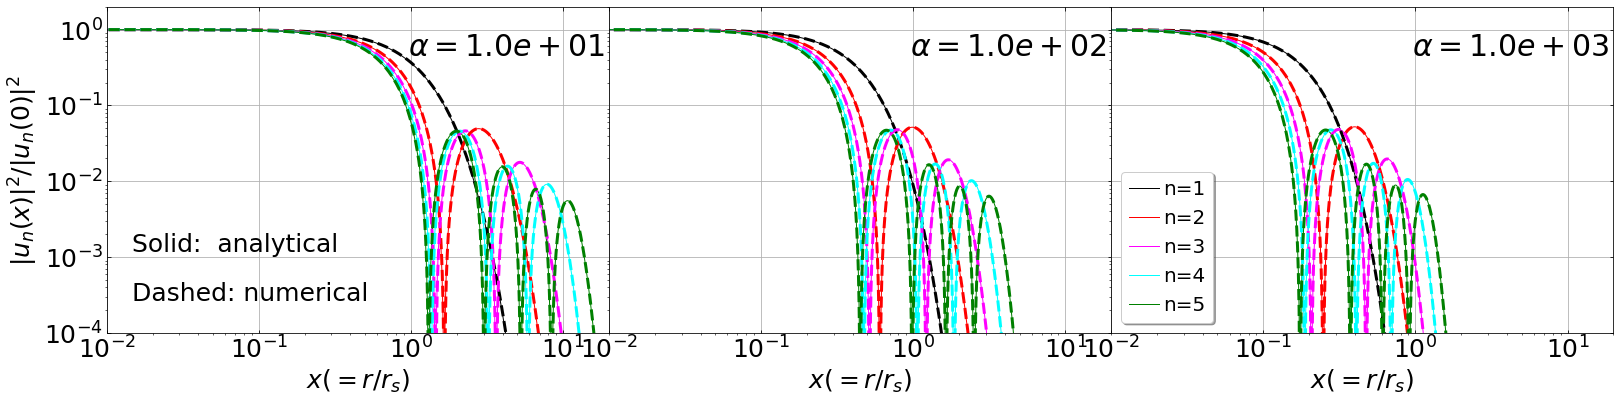

In [31]:
nmax = 200
xmin = 1.e-2
xmax = 20.
ymin   = 0.0001
ymax   = 2e0

xx = np.logspace(np.log10(xmin), np.log10(xmax), nmax)

plt.rcParams["font.size"] = 25
fig=plt.figure(figsize=(27,6))
gs = gridspec.GridSpec(1,3,wspace=0.0,hspace=0.0)


###################################### alpha = 10  #############################################

ax = plt.subplot(gs[0,0])
ax.tick_params(direction='in',bottom=True,left=True,right=False,top=True)
ax.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('log')


##### Analytical 
lw=1
ax.plot(x1, (eigen_func(alpha1,eps1[0], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[0], x1[0])))**2, 'black', lw=lw, label='n=1')
ax.plot(x1, (eigen_func(alpha1,eps1[1], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[1], x1[0])))**2, 'r', lw=lw, label='n=2')
ax.plot(x1, (eigen_func(alpha1,eps1[2], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[2], x1[0])))**2, 'magenta', lw=lw, label='n=3')
ax.plot(x1, (eigen_func(alpha1,eps1[3], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[3], x1[0])))**2, 'cyan', lw=lw, label='n=4')
ax.plot(x1, (eigen_func(alpha1,eps1[4], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[4], x1[0])))**2, 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha1
ax.plot(x1, (np.transpose(saga_data)[0]*x1[0]/(x1*np.transpose(saga_data)[0][0]))**2, "--", lw=lw, color='black')
ax.plot(x1, (np.transpose(saga_data)[1]*x1[0]/(x1*np.transpose(saga_data)[1][0]))**2, "--", lw=lw, color='r')
ax.plot(x1, (np.transpose(saga_data)[2]*x1[0]/(x1*np.transpose(saga_data)[2][0]))**2, "--", lw=lw, color='magenta')
ax.plot(x1, (np.transpose(saga_data)[3]*x1[0]/(x1*np.transpose(saga_data)[3][0]))**2, "--", lw=lw, color='cyan')
ax.plot(x1, (np.transpose(saga_data)[4]*x1[0]/(x1*np.transpose(saga_data)[4][0]))**2, "--", lw=lw, color='green')


ax.text(10**(np.log10(xmin) + 0.60*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=%2.1e$"%alpha1, fontsize=30)
ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.25*(np.log10(ymax)-np.log10(ymin))), "Solid:  analytical", fontsize=25)
ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.10*(np.log10(ymax)-np.log10(ymin))), "Dashed: numerical ", fontsize=25)
ax.set_xlabel('$x(=r/r_s)$')
ax.set_ylabel('$|u_{n}(x)|^2/|u_{n}(0)|^2$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid()
#bx.legend(shadow=True,loc='best',fontsize=20,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)

###################################### alpha = 100  #############################################

bx = plt.subplot(gs[0,1])
bx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)

bx.set_xscale('log')
bx.set_yscale('log')


##### Analytical 
lw=1
bx.plot(x2, (eigen_func(alpha2,eps2[0], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[0], x2[0])))**2, 'black', lw=lw, label='n=1')
bx.plot(x2, (eigen_func(alpha2,eps2[1], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[1], x2[0])))**2, 'r', lw=lw, label='n=2')
bx.plot(x2, (eigen_func(alpha2,eps2[2], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[2], x2[0])))**2, 'magenta', lw=lw, label='n=3')
bx.plot(x2, (eigen_func(alpha2,eps2[3], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[3], x2[0])))**2, 'cyan', lw=lw, label='n=4')
bx.plot(x2, (eigen_func(alpha2,eps2[4], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[4], x2[0])))**2, 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha2
bx.plot(x2, (np.transpose(saga_data)[0]*x2[0]/(x2*np.transpose(saga_data)[0][0]))**2, "--", lw=lw, color='black')
bx.plot(x2, (np.transpose(saga_data)[1]*x2[0]/(x2*np.transpose(saga_data)[1][0]))**2, "--", lw=lw, color='r')
bx.plot(x2, (np.transpose(saga_data)[2]*x2[0]/(x2*np.transpose(saga_data)[2][0]))**2, "--", lw=lw, color='magenta')
bx.plot(x2, (np.transpose(saga_data)[3]*x2[0]/(x2*np.transpose(saga_data)[3][0]))**2, "--", lw=lw, color='cyan')
bx.plot(x2, (np.transpose(saga_data)[4]*x2[0]/(x2*np.transpose(saga_data)[4][0]))**2, "--", lw=lw, color='green')


bx.text(10**(np.log10(xmin) + 0.60*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=%2.1e$"%alpha2, fontsize=30)
bx.set_xlabel('$x(=r/r_s)$')
bx.set_xlim(xmin, xmax)
bx.set_ylim(ymin, ymax)
bx.grid()

###################################### alpha = 1000  #############################################

cx = plt.subplot(gs[0,2])
cx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
cx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)

cx.set_xscale('log')
cx.set_yscale('log')


##### Analytical 
lw=1
cx.plot(x3, (eigen_func(alpha3,eps3[0], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[0], x3[0])))**2, 'black', lw=lw, label='n=1')
cx.plot(x3, (eigen_func(alpha3,eps3[1], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[1], x3[0])))**2, 'r', lw=lw, label='n=2')
cx.plot(x3, (eigen_func(alpha3,eps3[2], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[2], x3[0])))**2, 'magenta', lw=lw, label='n=3')
cx.plot(x3, (eigen_func(alpha3,eps3[3], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[3], x3[0])))**2, 'cyan', lw=lw, label='n=4')
cx.plot(x3, (eigen_func(alpha3,eps3[4], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[4], x3[0])))**2, 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha3
cx.plot(x3, (np.transpose(saga_data)[0]*x3[0]/(x3*np.transpose(saga_data)[0][0]))**2, "--", lw=lw, color='black')
cx.plot(x3, (np.transpose(saga_data)[1]*x3[0]/(x3*np.transpose(saga_data)[1][0]))**2, "--", lw=lw, color='r')
cx.plot(x3, (np.transpose(saga_data)[2]*x3[0]/(x3*np.transpose(saga_data)[2][0]))**2, "--", lw=lw, color='magenta')
cx.plot(x3, (np.transpose(saga_data)[3]*x3[0]/(x3*np.transpose(saga_data)[3][0]))**2, "--", lw=lw, color='cyan')
cx.plot(x3, (np.transpose(saga_data)[4]*x3[0]/(x3*np.transpose(saga_data)[4][0]))**2, "--", lw=lw, color='green')


cx.text(10**(np.log10(xmin) + 0.60*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=%2.1e$"%alpha3, fontsize=30)

cx.set_xlabel('$x(=r/r_s)$')
cx.set_xlim(xmin, xmax)
cx.set_ylim(ymin, ymax)
cx.grid()
cx.legend(shadow=True,loc='lower left',fontsize=20,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


plt.show()

# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/eigenfunctions_log_alpha10_100_1000.pdf')
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

#### Density profiles of ground-state eigenstate: Fig. 5

In [7]:
#### core size normalized by r_s

def x_core(alpha, eps):
    return np.sqrt(6/ (alpha*(1+eps)))


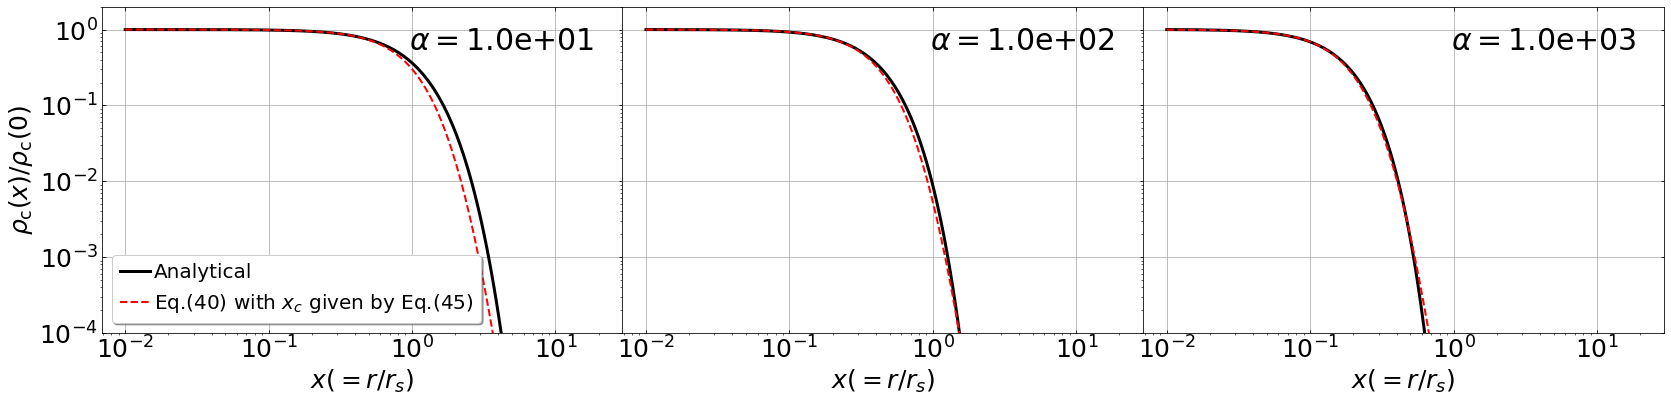

In [9]:
fact = 0.65

nmax = 200
xmin = 0.01
xmax = 20.
ymin   = 1.e-4
ymax   = 2

xx = np.logspace(np.log10(xmin), np.log10(xmax), nmax)


plt.rcParams["font.size"] = 25
fig=plt.figure(figsize=(28,6))
gs = gridspec.GridSpec(1,3,wspace=0.0,hspace=0.0)


######################
alpha=1.e1
eps1 = get_eigenvalues(alpha, 1, -0.999)[0]
rho_c = (eigen_function(alpha,eps1, xmin)/xmin)**2
rho_soliton = 1/(1 + 0.091 *(xx / (fact*x_core(alpha, eps1)) )**2 )**8

ax = plt.subplot(gs[0,0])
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
ax.plot(xx, (eigen_func(alpha,eps1, xx)/xx)**2/rho_c, 'black', lw=3, label='Analytical')
ax.plot(xx, rho_soliton, 'red', ls='--', lw=2, label="Eq.(40) with $x_c$ given by Eq.(45)")
ax.set_xlabel('$x(=r/r_s)$')
ax.set_ylabel('$\\rho_{\\rm c}(x)/\\rho_{\\rm c}(0)$')
ax.set_ylim(ymin, ymax)
ax.text(10**(np.log10(xmin) + 0.6*(np.log10(xmax)-np.log10(xmin))),   10**(np.log10(ymin) + 0.87*(np.log10(ymax)-np.log10(ymin))),  "$\\alpha=$%2.1e"%alpha, color='black', fontsize=30)
#ax.text(0.0015, 0.15*ymax, "$\\ell=0$", color='black', fontsize=30)
ax.grid()
#plt.legend(loc='upper left')
ax.legend(shadow=True,loc='lower left',fontsize=20,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5, framealpha=1)


######################
alpha=1.e2
eps1 = get_eigenvalues(alpha, 1, -0.999)[0]
rho_c = (eigen_function(alpha,eps1, xmin)/xmin)**2
rho_soliton = 1/(1 + 0.091 *(xx / (fact*x_core(alpha, eps1)) )**2 )**8

bx = plt.subplot(gs[0,1])
bx.set_xscale('log')
bx.set_yscale('log')
bx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)
bx.plot(xx, (eigen_func(alpha,eps1, xx)/xx)**2/rho_c, 'black', lw=3)
bx.plot(xx, rho_soliton, 'red', ls='--', lw=2)
bx.set_xlabel('$x(=r/r_s)$')
#bx.set_ylabel('$\\rho/\\rho_c$')
bx.set_ylim(ymin, ymax)
bx.text(10**(np.log10(xmin) + 0.6*(np.log10(xmax)-np.log10(xmin))),   10**(np.log10(ymin) + 0.87*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=$%2.1e"%alpha, color='black', fontsize=30)
#bx.text(0.0015, 0.15*ymax, "$\\ell=0$", color='black', fontsize=30)
bx.grid()
#plt.legend(loc='upper left')
#bx.legend(shadow=True,loc='lower left',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


######################
alpha=1.e3
eps1 = get_eigenvalues(alpha, 1, -0.999)[0]
rho_c = (eigen_function(alpha,eps1, xmin)/xmin)**2
rho_soliton = 1/(1 + 0.091 *(xx / (fact*x_core(alpha, eps1)) )**2 )**8

cx = plt.subplot(gs[0,2])
cx.set_xscale('log')
cx.set_yscale('log')
cx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
cx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)
cx.plot(xx, (eigen_func(alpha,eps1, xx)/xx)**2/rho_c, 'black', lw=3)
cx.plot(xx, rho_soliton, 'red', ls='--', lw=2)
cx.set_xlabel('$x(=r/r_s)$')
cx.set_ylim(ymin, ymax)
cx.text(10**(np.log10(xmin) + 0.6*(np.log10(xmax)-np.log10(xmin))),   10**(np.log10(ymin) + 0.87*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=$%2.1e"%alpha, color='black', fontsize=30)
#cx.text(0.0015, 0.15*ymax, "$\\ell=0$", color='black', fontsize=30)
cx.grid()

plt.show()

## Output to PDF file
# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/comparison_profile.pdf')
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

#### Testing analytical eigenfunctions against numerical solutions for small $\alpha$:  $\alpha=0.1$, $1$, $10$

In [7]:
# start = time.time()

ell    = 0

start = time.time()

########
alpha1 = 0.1
xmin1 = 0
xmax1 = 300.0
n1    = 30000  # Number of intervals

delta1= (xmax1-xmin1)/n1
dim1  = n1 - 1 # Number of internal points
x1    = np.linspace(xmin1+delta1, xmax1-delta1, dim1)
h1   = np.zeros((dim1,dim1),float)

# Construct Hamiltonian
for i in range(len(h1)-1):
        h1[i,i+1] = h1[i+1,i] = -1/delta1**2
for i in range(len(h1)):
        h1[i,i] = 2./delta1**2 + V_pot(alpha1, ell, x1[i])

# Solve
vals_alpha1, vecs_alpha1 = linalg.eigh(h1) #Note: eigenvectors in columns of vecs

########
alpha2 = 1
xmin2 = 0
#xmax2 = 10.0
xmax2 = 100.0
n2    = 20000  # Number of intervals

delta2= (xmax2-xmin2)/n2
dim2  = n2 - 1 # Number of internal points
x2    = np.linspace(xmin2+delta2, xmax2-delta2, dim2)
h2    = np.zeros((dim2,dim2),float)

# Construct Hamiltonian
for i in range(len(h2)-1):
        h2[i,i+1] = h2[i+1,i] = -1/delta2**2
for i in range(len(h2)):
        h2[i,i] = 2./delta2**2 + V_pot(alpha2, ell, x2[i])

# Solve
vals_alpha2, vecs_alpha2 = linalg.eigh(h2) #Note: eigenvectors in columns of vecs

########
alpha3 = 10
xmin3 = 0
#xmax3 = 5.0
xmax3 = 50.0
n3    = 10000  # Number of intervals

delta3= (xmax3-xmin3)/n3
dim3  = n3 - 1 # Number of internal points
x3    = np.linspace(xmin3+delta3, xmax3-delta3, dim3)
h3    = np.zeros((dim3,dim3),float)

# Construct Hamiltonian
for i in range(len(h3)-1):
        h3[i,i+1] = h3[i+1,i] = -1/delta3**2
for i in range(len(h3)):
        h3[i,i] = 2./delta3**2 + V_pot(alpha3, ell, x3[i])

# Solve
vals_alpha3, vecs_alpha3 = linalg.eigh(h3) #Note: eigenvectors in columns of vecs


print("{:f}".format((time.time() - start)/60.0)+" min")## Test:

31.648295 min


In [34]:
#### Eigenvalues for n=1--5: analytical
nn = 5
E_list1 = get_eigenvalues(alpha1, nn, -0.999)
E_list2 = get_eigenvalues(alpha2, nn, -0.999)
E_list3 = get_eigenvalues(alpha3, nn, -0.999)
eps1        = np.zeros(nn)
eps2        = np.zeros(nn)
eps3        = np.zeros(nn)
norm_eigen1 = np.zeros(nn)
norm_eigen2 = np.zeros(nn)
norm_eigen3 = np.zeros(nn)
for i in range(nn):
    eps1[i]        = E_list1[i]
    eps2[i]        = E_list2[i]
    eps3[i]        = E_list3[i]
    norm_eigen1[i] = norm_ell_zero(alpha1, E_list1[i])
    norm_eigen2[i] = norm_ell_zero(alpha2, E_list2[i])
    norm_eigen3[i] = norm_ell_zero(alpha3, E_list3[i])
    print(eps1[i], eps2[i], eps3[i])

-0.13736104111103445 -0.32075025551752 -0.5493498172977608
-0.060461272547577334 -0.17874684316446102 -0.382048685732534
-0.036453601760787116 -0.12144419430501079 -0.2948972957056003
-0.02514753340663634 -0.09048485564829056 -0.23992650155582096
-0.011864320524439732 -0.07121382587520535 -0.201750415469653


In [35]:
#### Eigenvalues for n=1--5: numerical
norm_num1 = np.zeros(nn)
norm_num2 = np.zeros(nn)
norm_num3 = np.zeros(nn)
for i in range(nn):
    norm_num1[i] = np.sqrt(integrate.simps(np.transpose(vecs_alpha1)[i]**2,x1))
    norm_num2[i] = np.sqrt(integrate.simps(np.transpose(vecs_alpha2)[i]**2,x2))
    norm_num3[i] = np.sqrt(integrate.simps(np.transpose(vecs_alpha3)[i]**2,x3))

    print(vals_alpha1[i]/alpha1, vals_alpha2[i]/alpha2, vals_alpha3[i]/alpha3)

-0.12869044658743506 -0.31435005317546993 -0.5470530675318012
-0.05840818179758071 -0.17669391993148964 -0.3809986938562417
-0.033195909229966764 -0.12044980177746781 -0.2942824990084169
-0.007185474039341777 -0.08990504751120745 -0.2395204425822414
0.029010273707647354 -0.07083728894942654 -0.20146179339057935


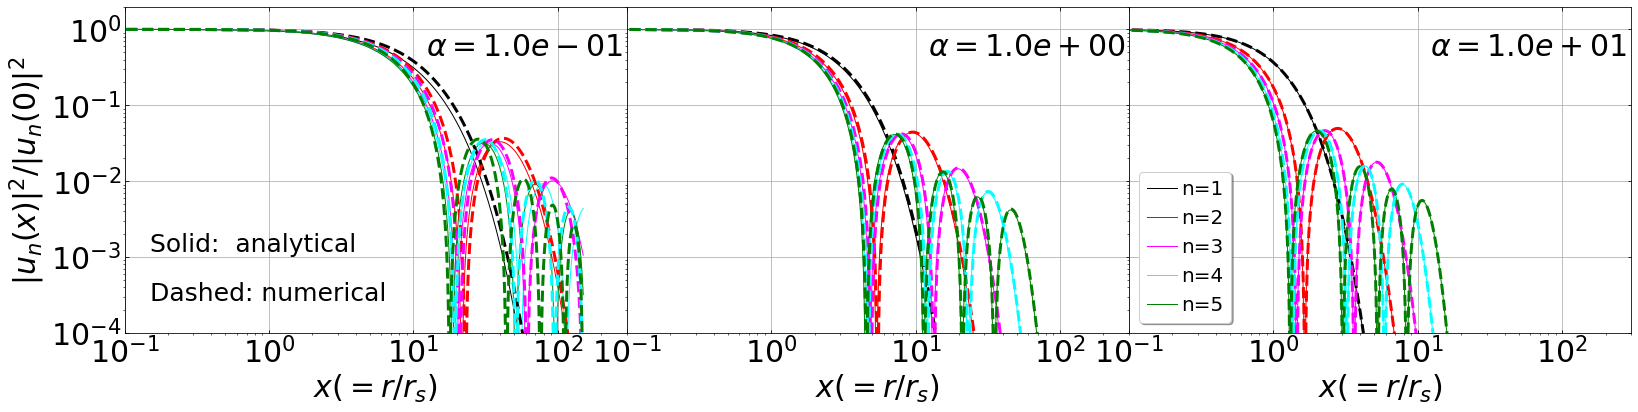

In [39]:
nmax = 200
xmin = 1.e-1
xmax = 300.
ymin   = 0.0001
ymax   = 2e0

xx = np.logspace(np.log10(xmin), np.log10(xmax), nmax)

plt.rcParams["font.size"] = 30
fig=plt.figure(figsize=(27,6))
gs = gridspec.GridSpec(1,3,wspace=0.0,hspace=0.0)


###################################### alpha = 10  #############################################

ax = plt.subplot(gs[0,0])
ax.tick_params(direction='in',bottom=True,left=True,right=False,top=True)
ax.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('log')


##### Analytical 
lw=1
ax.plot(x1, (eigen_func(alpha1,eps1[0], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[0], x1[0])))**2, 'black', lw=lw, label='n=1')
ax.plot(x1, (eigen_func(alpha1,eps1[1], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[1], x1[0])))**2, 'r', lw=lw, label='n=2')
ax.plot(x1, (eigen_func(alpha1,eps1[2], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[2], x1[0])))**2, 'magenta', lw=lw, label='n=3')
ax.plot(x1, (eigen_func(alpha1,eps1[3], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[3], x1[0])))**2, 'cyan', lw=lw, label='n=4')
ax.plot(x1, (eigen_func(alpha1,eps1[4], x1)*x1[0]/(x1*eigen_func(alpha1,eps1[4], x1[0])))**2, 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha1
ax.plot(x1, (np.transpose(saga_data)[0]*x1[0]/(x1*np.transpose(saga_data)[0][0]))**2, "--", lw=lw, color='black')
ax.plot(x1, (np.transpose(saga_data)[1]*x1[0]/(x1*np.transpose(saga_data)[1][0]))**2, "--", lw=lw, color='r')
ax.plot(x1, (np.transpose(saga_data)[2]*x1[0]/(x1*np.transpose(saga_data)[2][0]))**2, "--", lw=lw, color='magenta')
ax.plot(x1, (np.transpose(saga_data)[3]*x1[0]/(x1*np.transpose(saga_data)[3][0]))**2, "--", lw=lw, color='cyan')
ax.plot(x1, (np.transpose(saga_data)[4]*x1[0]/(x1*np.transpose(saga_data)[4][0]))**2, "--", lw=lw, color='green')


ax.text(10**(np.log10(xmin) + 0.60*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=%2.1e$"%alpha1, fontsize=30)
ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.25*(np.log10(ymax)-np.log10(ymin))), "Solid:  analytical", fontsize=25)
ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.10*(np.log10(ymax)-np.log10(ymin))), "Dashed: numerical ", fontsize=25)
ax.set_xlabel('$x(=r/r_s)$')
ax.set_ylabel('$|u_{n}(x)|^2/|u_{n}(0)|^2$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.grid()
#bx.legend(shadow=True,loc='best',fontsize=20,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)

###################################### alpha = 100  #############################################

bx = plt.subplot(gs[0,1])
bx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)

bx.set_xscale('log')
bx.set_yscale('log')


##### Analytical 
lw=1
bx.plot(x2, (eigen_func(alpha2,eps2[0], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[0], x2[0])))**2, 'black', lw=lw, label='n=1')
bx.plot(x2, (eigen_func(alpha2,eps2[1], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[1], x2[0])))**2, 'r', lw=lw, label='n=2')
bx.plot(x2, (eigen_func(alpha2,eps2[2], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[2], x2[0])))**2, 'magenta', lw=lw, label='n=3')
bx.plot(x2, (eigen_func(alpha2,eps2[3], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[3], x2[0])))**2, 'cyan', lw=lw, label='n=4')
bx.plot(x2, (eigen_func(alpha2,eps2[4], x2)*x2[0]/(x2*eigen_func(alpha2,eps2[4], x2[0])))**2, 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha2
bx.plot(x2, (np.transpose(saga_data)[0]*x2[0]/(x2*np.transpose(saga_data)[0][0]))**2, "--", lw=lw, color='black')
bx.plot(x2, (np.transpose(saga_data)[1]*x2[0]/(x2*np.transpose(saga_data)[1][0]))**2, "--", lw=lw, color='r')
bx.plot(x2, (np.transpose(saga_data)[2]*x2[0]/(x2*np.transpose(saga_data)[2][0]))**2, "--", lw=lw, color='magenta')
bx.plot(x2, (np.transpose(saga_data)[3]*x2[0]/(x2*np.transpose(saga_data)[3][0]))**2, "--", lw=lw, color='cyan')
bx.plot(x2, (np.transpose(saga_data)[4]*x2[0]/(x2*np.transpose(saga_data)[4][0]))**2, "--", lw=lw, color='green')


bx.text(10**(np.log10(xmin) + 0.60*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=%2.1e$"%alpha2, fontsize=30)
bx.set_xlabel('$x(=r/r_s)$')
bx.set_xlim(xmin, xmax)
bx.set_ylim(ymin, ymax)
bx.grid()

###################################### alpha = 1000  #############################################

cx = plt.subplot(gs[0,2])
cx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
cx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)

cx.set_xscale('log')
cx.set_yscale('log')


##### Analytical 
lw=1
cx.plot(x3, (eigen_func(alpha3,eps3[0], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[0], x3[0])))**2, 'black', lw=lw, label='n=1')
cx.plot(x3, (eigen_func(alpha3,eps3[1], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[1], x3[0])))**2, 'r', lw=lw, label='n=2')
cx.plot(x3, (eigen_func(alpha3,eps3[2], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[2], x3[0])))**2, 'magenta', lw=lw, label='n=3')
cx.plot(x3, (eigen_func(alpha3,eps3[3], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[3], x3[0])))**2, 'cyan', lw=lw, label='n=4')
cx.plot(x3, (eigen_func(alpha3,eps3[4], x3)*x3[0]/(x3*eigen_func(alpha3,eps3[4], x3[0])))**2, 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_alpha3
cx.plot(x3, (np.transpose(saga_data)[0]*x3[0]/(x3*np.transpose(saga_data)[0][0]))**2, "--", lw=lw, color='black')
cx.plot(x3, (np.transpose(saga_data)[1]*x3[0]/(x3*np.transpose(saga_data)[1][0]))**2, "--", lw=lw, color='r')
cx.plot(x3, (np.transpose(saga_data)[2]*x3[0]/(x3*np.transpose(saga_data)[2][0]))**2, "--", lw=lw, color='magenta')
cx.plot(x3, (np.transpose(saga_data)[3]*x3[0]/(x3*np.transpose(saga_data)[3][0]))**2, "--", lw=lw, color='cyan')
cx.plot(x3, (np.transpose(saga_data)[4]*x3[0]/(x3*np.transpose(saga_data)[4][0]))**2, "--", lw=lw, color='green')


cx.text(10**(np.log10(xmin) + 0.60*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\alpha=%2.1e$"%alpha3, fontsize=30)

cx.set_xlabel('$x(=r/r_s)$')
cx.set_xlim(xmin, xmax)
cx.set_ylim(ymin, ymax)
cx.grid()
cx.legend(shadow=True,loc='lower left',fontsize=20,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


plt.show()

# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/eigenfunctions_log_alpha01_1_10.pdf')
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

## <font style="color: red; ">  Results (2): $\ell\ne0$ for $\alpha=10^3$

### Solving eigenvalue problem numerically: $\ell=2,\,5,\,10$

In [45]:
# start = time.time()

alpha = 1.e3

start = time.time()

########
ell1   = 2
xmin1 = 0
xmax1 = 5.0
n1    = 10000  # Number of intervals

delta1= (xmax1-xmin1)/n1
dim1  = n1 - 1 # Number of internal points
x1    = np.linspace(xmin1+delta1, xmax1-delta1, dim1)
h1   = np.zeros((dim1,dim1),float)

# Construct Hamiltonian
for i in range(len(h1)-1):
        h1[i,i+1] = h1[i+1,i] = -1/delta1**2
for i in range(len(h1)):
        h1[i,i] = 2./delta1**2 + V_pot(alpha, ell1, x1[i])

# Solve
vals_ell1, vecs_ell1 = linalg.eigh(h1) #Note: eigenvectors in columns of vecs

########
ell2  = 5
xmin2 = 0
xmax2 = 5.0
n2    = 10000  # Number of intervals

delta2= (xmax2-xmin2)/n2
dim2  = n2 - 1 # Number of internal points
x2    = np.linspace(xmin2+delta2, xmax2-delta2, dim2)
h2    = np.zeros((dim2,dim2),float)

# Construct Hamiltonian
for i in range(len(h2)-1):
        h2[i,i+1] = h2[i+1,i] = -1/delta2**2
for i in range(len(h2)):
        h2[i,i] = 2./delta2**2 + V_pot(alpha, ell2, x2[i])

# Solve
vals_ell2, vecs_ell2 = linalg.eigh(h2) #Note: eigenvectors in columns of vecs

########
ell3  = 10
xmin3 = 0
xmax3 = 5.0
n3    = 10000  # Number of intervals

delta3= (xmax3-xmin3)/n3
dim3  = n3 - 1 # Number of internal points
x3    = np.linspace(xmin3+delta3, xmax3-delta3, dim3)
h3    = np.zeros((dim3,dim3),float)

# Construct Hamiltonian
for i in range(len(h3)-1):
        h3[i,i+1] = h3[i+1,i] = -1/delta3**2
for i in range(len(h3)):
        h3[i,i] = 2./delta3**2 + V_pot(alpha, ell3, x3[i])


# Solve
vals_ell3, vecs_ell3 = linalg.eigh(h3) #Note: eigenvectors in columns of vecs

print("{:f}".format((time.time() - start)/60.0)+" min")

5.191197 min


In [46]:
#### Eigenvalues for n=1--5: numerical
for i in range(5):
    print(vals_ell1[i]/alpha, vals_ell2[i]/alpha, vals_ell3[i]/alpha)

-0.7727842239326461 -0.6775621513710286 -0.5699881850580477
-0.716202552662986 -0.638629634779717 -0.5446580885694032
-0.670291997806975 -0.6049144722490244 -0.521740061901777
-0.6316336989678994 -0.5752571101024777 -0.5008662470598064
-0.5982837923642793 -0.5488513772763902 -0.48174563177842483


In [49]:
#### Eigenvalues for n=1--5: analytical
nn = 5
eps_init1 = -0.79
eps_init2 = -0.69
eps_init3 = -0.58 
x_crit1   = 0.01
x_crit2   = 0.01
x_crit3   = 0.1
E_list1 = get_eigenvalue_non_zero_ell(alpha, nn, ell1, eps_init1)
E_list2 = get_eigenvalue_non_zero_ell(alpha, nn, ell2, eps_init2)
E_list3 = get_eigenvalue_non_zero_ell(alpha, nn, ell3, eps_init3)
eps1        = np.zeros(nn)
eps2        = np.zeros(nn)
eps3        = np.zeros(nn)
beta1       = np.zeros(nn)
beta2       = np.zeros(nn)
beta3       = np.zeros(nn)
norm_eigen1 = np.zeros(nn)
norm_eigen2 = np.zeros(nn)
norm_eigen3 = np.zeros(nn)
for i in range(nn):
    eps1[i]        = E_list1[i]
    eps2[i]        = E_list2[i]
    eps3[i]        = E_list3[i]
    beta1[i]       = get_beta(alpha, ell1, eps1[i])
    beta2[i]       = get_beta(alpha, ell2, eps2[i])
    beta3[i]       = get_beta(alpha, ell3, eps3[i])
    norm_eigen1[i] = norm_non_zero_ell(alpha, ell1, E_list1[i], x_crit1)
    norm_eigen2[i] = norm_non_zero_ell(alpha, ell2, E_list2[i], x_crit2)
    norm_eigen3[i] = norm_non_zero_ell(alpha, ell3, E_list3[i], x_crit3)
    print(eps1[i], eps2[i], eps3[i])

-0.7745424564107277 -0.6781006406147033 -0.5701751506153919
-0.7175713609468329 -0.6390876478886729 -0.5448258392015195
-0.6714166326311765 -0.6053119839032362 -0.5218917581280799
-0.6325881669549401 -0.575607354726028 -0.5010043392234049
-0.5991117405083398 -0.5491636178791995 -0.48187205846088216


In [50]:
#### Norm for n=1--5: analytical
for i in range(5):
    print(norm_eigen1[i],norm_eigen2[i],norm_eigen3[i])

0.5569885622610471 0.6876907302445695 0.8639945685952036
0.6265814708836811 0.7424942066996308 0.9100023198225246
0.9734965889981122 1.1235919959633214 1.3506030743472817
1.8253982264580892 2.0682719238578735 2.4475264785673443
3.9125563889574106 4.372597968872725 5.107944142517472


In [51]:
#### Beta for n=1--5: analytical
for i in range(5):
    print(beta1[i],beta2[i],beta3[i])

0.1778279410038924 0.17782794100389193 0.1778279410038918
0.3080070288241023 0.3080070288241026 0.3080070288241024
0.3976353643835254 0.3976353643835254 0.3976353643835253
0.47048850805496484 0.4704885080549646 0.47048850805496506
0.533483823011677 0.5334838230116771 0.5334838230116767


In [52]:
###############################################################################
#### Generating analytical eigenfunctions :  This will take time (~ 1 min) ####
###############################################################################

nskip = 8

eigen_ell1 = np.zeros((5,len(x1[0::nskip])))
eigen_ell2 = np.zeros((5,len(x2[0::nskip])))
eigen_ell3 = np.zeros((5,len(x3[0::nskip])))
for i in range(nn):
    eigen_ell1[i] = eigen_func_non_zero_ell(alpha, ell1, eps1[i], beta1[i], x_crit1, x1[0::nskip])
    eigen_ell2[i] = eigen_func_non_zero_ell(alpha, ell2, eps2[i], beta2[i], x_crit2, x2[0::nskip])
    eigen_ell3[i] = eigen_func_non_zero_ell(alpha, ell3, eps3[i], beta3[i], x_crit3, x3[0::nskip])

In [53]:
y_threshold = 1e-6

norm_num1 = np.zeros(nn)
norm_num2 = np.zeros(nn)
norm_num3 = np.zeros(nn)
n_init1    = np.zeros(nn)
n_init2    = np.zeros(nn)
n_init3    = np.zeros(nn)
n_end1    = np.zeros(nn)
n_end2    = np.zeros(nn)
n_end3    = np.zeros(nn)

for i in range(nn):
    norm_num1[i] = np.sqrt(integrate.simps(np.transpose(vecs_ell1)[i]**2,x1))
    norm_num2[i] = np.sqrt(integrate.simps(np.transpose(vecs_ell2)[i]**2,x2))
    norm_num3[i] = np.sqrt(integrate.simps(np.transpose(vecs_ell3)[i]**2,x3))
    n_end1[i]    = find_xcut(np.transpose(vecs_ell1)[i]/norm_num1[i], y_threshold)
    n_end2[i]    = find_xcut(np.transpose(vecs_ell2)[i]/norm_num2[i], y_threshold)
    n_end3[i]    = find_xcut(np.transpose(vecs_ell3)[i]/norm_num3[i], y_threshold)
    n_init1[i]   = find_xcut2(np.transpose(vecs_ell1)[i]/norm_num1[i], y_threshold)
    n_init2[i]   = find_xcut2(np.transpose(vecs_ell2)[i]/norm_num2[i], y_threshold)
    n_init3[i]   = find_xcut2(np.transpose(vecs_ell3)[i]/norm_num3[i], y_threshold)

## Change from float to integer
n_end1 = np.asarray(n_end1, dtype = int)
n_end2 = np.asarray(n_end2, dtype = int)
n_end3 = np.asarray(n_end3, dtype = int)
n_init1 = np.asarray(n_init1, dtype = int)
n_init2 = np.asarray(n_init2, dtype = int)
n_init3 = np.asarray(n_init3, dtype = int)

In [54]:
print(n_init1,n_init2,n_init3)
print(n_end1,n_end2,n_end3)

[3 3 3 2 2] [68 61 57 55 53] [338 312 296 284 275]
[3728 4390 5011 5613 6203] [4694 5339 5950 6546 7135] [6185 6849 7475 8084 8685]


In [55]:
x2[n_init2]

array([0.0345, 0.031 , 0.029 , 0.028 , 0.027 ])

In [56]:
(eigen_ell2[1]/norm_eigen2[1])[10]

-5.466157151910773e-06

In [57]:
###########################################################################################
### Generating truncated analytical eigenfunctions ( !!! This will take long time !!! ) ###
###########################################################################################
start = time.time()

##### ell1
xx = x1[n_init1[0]:n_end1[0]]
eigen_ell1_cut0 = eigen_func_non_zero_ell(alpha, ell1, eps1[0], beta1[0], x_crit1, xx)

xx = x1[n_init1[1]:n_end1[1]]
eigen_ell1_cut1 = eigen_func_non_zero_ell(alpha, ell1, eps1[1], beta1[1], x_crit1, xx)

xx = x1[n_init1[2]:n_end1[2]]
eigen_ell1_cut2 = eigen_func_non_zero_ell(alpha, ell1, eps1[2], beta1[2], x_crit1, xx)

xx = x1[n_init1[3]:n_end1[3]]
eigen_ell1_cut3 = eigen_func_non_zero_ell(alpha, ell1, eps1[3], beta1[3], x_crit1, xx)

xx = x1[n_init1[4]:n_end1[4]]
eigen_ell1_cut4 = eigen_func_non_zero_ell(alpha, ell1, eps1[4], beta1[4], x_crit1, xx)

##### ell2
xx = x2[n_init2[0]:n_end2[0]]
eigen_ell2_cut0 = eigen_func_non_zero_ell(alpha, ell2, eps2[0], beta2[0], x_crit2, xx)

xx = x2[n_init2[1]:n_end2[1]]
eigen_ell2_cut1 = eigen_func_non_zero_ell(alpha, ell2, eps2[1], beta2[1], x_crit2, xx)

xx = x2[n_init2[2]:n_end2[2]]
eigen_ell2_cut2 = eigen_func_non_zero_ell(alpha, ell2, eps2[2], beta2[2], x_crit2, xx)

xx = x2[n_init2[3]:n_end2[3]]
eigen_ell2_cut3 = eigen_func_non_zero_ell(alpha, ell2, eps2[3], beta2[3], x_crit2, xx)

xx = x2[n_init2[4]:n_end2[4]]
eigen_ell2_cut4 = eigen_func_non_zero_ell(alpha, ell2, eps2[4], beta2[4], x_crit2, xx)

##### ell3
xx = x3[n_init3[0]:n_end3[0]]
eigen_ell3_cut0 = eigen_func_non_zero_ell(alpha, ell3, eps3[0], beta3[0], x_crit3, xx)

xx = x3[n_init3[1]:n_end3[1]]
eigen_ell3_cut1 = eigen_func_non_zero_ell(alpha, ell3, eps3[1], beta3[1], x_crit3, xx)

xx = x3[n_init3[2]:n_end3[2]]
eigen_ell3_cut2 = eigen_func_non_zero_ell(alpha, ell3, eps3[2], beta3[2], x_crit3, xx)

xx = x3[n_init3[3]:n_end3[3]]
eigen_ell3_cut3 = eigen_func_non_zero_ell(alpha, ell3, eps3[3], beta3[3], x_crit3, xx)

xx = x3[n_init3[4]:n_end3[4]]
eigen_ell3_cut4 = eigen_func_non_zero_ell(alpha, ell3, eps3[4], beta3[4], x_crit3, xx)

print("{:f}".format((time.time() - start)/60.0)+" min")

10.274813 min


### Figures 11 & 12

#### Normalized eigenfunctions: Fig. 11

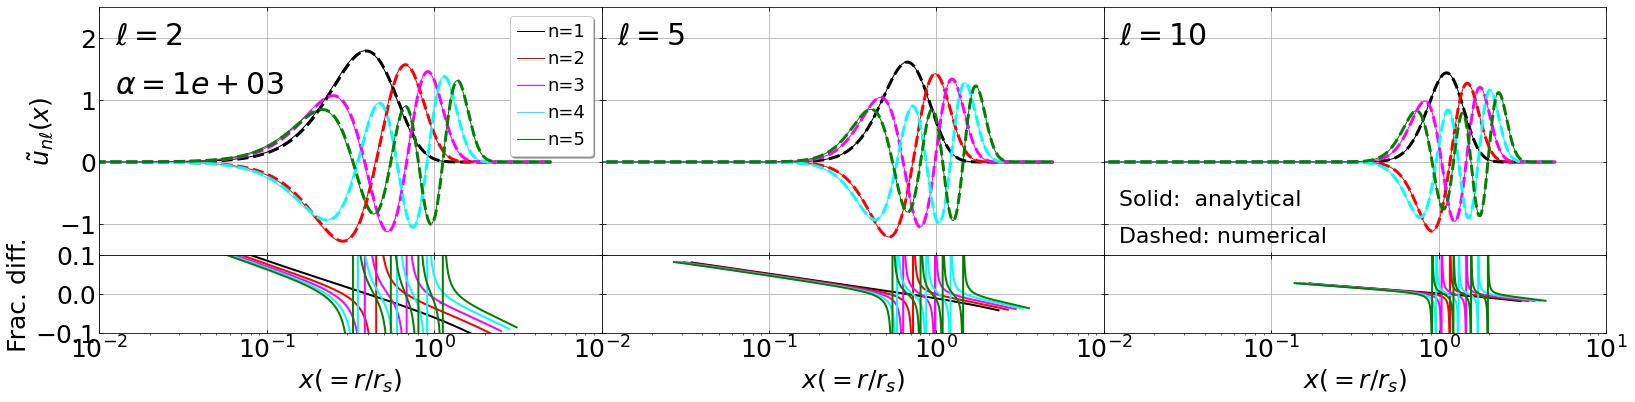

In [64]:
nmax = 200
xmin = 0.01
xmax = 10.
y1min   = -1.5
y1max   =  2.5
# y2min   = -0.05
# y2max   =  0.05
y2min   = -0.1
y2max   =  0.1


plt.rcParams["font.size"] = 25
fig=plt.figure(figsize=(27,6))
gs = gridspec.GridSpec(2,3,wspace=0.0,hspace=0.0,height_ratios=[4, 1.25])

################################################################
##########################  ell = 2   ##########################
################################################################

ax = plt.subplot(gs[0,0])

ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=False,labelleft=True,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('linear')


##### Analytical
lw=1
ax.plot(x1[0::nskip], eigen_ell1[0]/norm_eigen1[0], 'black', lw=lw, label='n=1')
ax.plot(x1[0::nskip], eigen_ell1[1]/norm_eigen1[1], 'r', lw=lw, label='n=2')
ax.plot(x1[0::nskip], eigen_ell1[2]/norm_eigen1[2], 'magenta', lw=lw, label='n=3')
ax.plot(x1[0::nskip], eigen_ell1[3]/norm_eigen1[3], 'cyan', lw=lw, label='n=4')
ax.plot(x1[0::nskip], eigen_ell1[4]/norm_eigen1[4], 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_ell1

ax.plot(x1[0::nskip], (np.transpose(saga_data)[0][0::nskip]/norm_num1[0]), "--", lw=lw, color='black')
ax.plot(x1[0::nskip], (np.transpose(saga_data)[1][0::nskip]/norm_num1[1]), "--", lw=lw, color='r')
ax.plot(x1[0::nskip], (np.transpose(saga_data)[2][0::nskip]/norm_num1[2]), "--", lw=lw, color='magenta')
ax.plot(x1[0::nskip], (np.transpose(saga_data)[3][0::nskip]/norm_num1[3]), "--", lw=lw, color='cyan')
ax.plot(x1[0::nskip], (np.transpose(saga_data)[4][0::nskip]/norm_num1[4]), "--", lw=lw, color='green')

ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.85*(y1max-y1min), "$\\ell=%2i$"%ell1, fontsize=30)
ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.65*(y1max-y1min), "$\\alpha=%2.1g$"%alpha, fontsize=30)
# ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.20*(y1max-y1min), "Solid:  analytical", fontsize=22)
# ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.05*(y1max-y1min), "Dashed: numerical ", fontsize=22)

#ax.set_xlabel('$x(=r/r_s)$')
ax.set_ylabel('$\\tilde{u}_{n\\ell}(x)$')
ax.set_xlim(xmin, xmax)
ax.set_ylim(y1min, y1max)
ax.grid()
ax.legend(shadow=True,loc='upper right',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


bx = plt.subplot(gs[1,0])
bx.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
bx.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

bx.set_xscale('log')
bx.set_yscale('linear')

lw=2
bx.plot(x1[n_init1[0]:n_end1[0]], (eigen_ell1_cut0/norm_eigen1[0]) / ((np.transpose(saga_data)[0][n_init1[0]:n_end1[0]]/norm_num1[0]))-1, "-", lw=lw, color='black')
bx.plot(x1[n_init1[1]:n_end1[1]], (eigen_ell1_cut1/norm_eigen1[1]) / ((np.transpose(saga_data)[1][n_init1[1]:n_end1[1]]/norm_num1[1]))-1, "-", lw=lw, color='r')
bx.plot(x1[n_init1[2]:n_end1[2]], (eigen_ell1_cut2/norm_eigen1[2]) / ((np.transpose(saga_data)[2][n_init1[2]:n_end1[2]]/norm_num1[2]))-1, "-", lw=lw, color='magenta')
bx.plot(x1[n_init1[3]:n_end1[3]], (eigen_ell1_cut3/norm_eigen1[3]) / ((np.transpose(saga_data)[3][n_init1[3]:n_end1[3]]/norm_num1[3]))-1, "-", lw=lw, color='cyan')
bx.plot(x1[n_init1[4]:n_end1[4]], (eigen_ell1_cut4/norm_eigen1[4]) / ((np.transpose(saga_data)[4][n_init1[4]:n_end1[4]]/norm_num1[4]))-1, "-", lw=lw, color='green')

bx.set_xlabel('$x(=r/r_s)$')
bx.set_ylabel('Frac. diff.')
bx.set_xlim(xmin, xmax-0.001)
bx.set_ylim(y2min, y2max)

bx.grid()

################################################################
##########################  ell = 5   ##########################
################################################################

ax = plt.subplot(gs[0,1])

ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('linear')

##### Analytical
lw=1
ax.plot(x2[0::nskip], eigen_ell2[0]/norm_eigen2[0], 'black', lw=lw, label='n=1')
ax.plot(x2[0::nskip], eigen_ell2[1]/norm_eigen2[1], 'r', lw=lw, label='n=2')
ax.plot(x2[0::nskip], eigen_ell2[2]/norm_eigen2[2], 'magenta', lw=lw, label='n=3')
ax.plot(x2[0::nskip], eigen_ell2[3]/norm_eigen2[3], 'cyan', lw=lw, label='n=4')
ax.plot(x2[0::nskip], eigen_ell2[4]/norm_eigen2[4], 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_ell2

ax.plot(x2[0::nskip], (np.transpose(saga_data)[0][0::nskip]/norm_num2[0]), "--", lw=lw, color='black')
ax.plot(x2[0::nskip], (np.transpose(saga_data)[1][0::nskip]/norm_num2[1]), "--", lw=lw, color='r')
ax.plot(x2[0::nskip], (np.transpose(saga_data)[2][0::nskip]/norm_num2[2]), "--", lw=lw, color='magenta')
ax.plot(x2[0::nskip], (np.transpose(saga_data)[3][0::nskip]/norm_num2[3]), "--", lw=lw, color='cyan')
ax.plot(x2[0::nskip], (np.transpose(saga_data)[4][0::nskip]/norm_num2[4]), "--", lw=lw, color='green')

ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.85*(y1max-y1min), "$\\ell=%2i$"%ell2, fontsize=30)
# ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.20*(y1max-y1min), "Solid:  analytical", fontsize=22)
# ax.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)-np.log10(xmin))), y1min + 0.05*(y1max-y1min), "Dashed: numerical ", fontsize=22)

ax.set_xlim(xmin, xmax)
ax.set_ylim(y1min, y1max)
ax.grid()
#ax.legend(shadow=True,loc='upper left',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


bx = plt.subplot(gs[1,1])
bx.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)
bx.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

bx.set_xscale('log')
bx.set_yscale('linear')


lw=2
bx.plot(x2[n_init2[0]:n_end2[0]], (eigen_ell2_cut0/norm_eigen2[0]) / ((np.transpose(saga_data)[0][n_init2[0]:n_end2[0]]/norm_num2[0]))-1, "-", lw=lw, color='black')
bx.plot(x2[n_init2[1]:n_end2[1]], (eigen_ell2_cut1/norm_eigen2[1]) / ((np.transpose(saga_data)[1][n_init2[1]:n_end2[1]]/norm_num2[1]))-1, "-", lw=lw, color='r')
bx.plot(x2[n_init2[2]:n_end2[2]], (eigen_ell2_cut2/norm_eigen2[2]) / ((np.transpose(saga_data)[2][n_init2[2]:n_end2[2]]/norm_num2[2]))-1, "-", lw=lw, color='magenta')
bx.plot(x2[n_init2[3]:n_end2[3]], (eigen_ell2_cut3/norm_eigen2[3]) / ((np.transpose(saga_data)[3][n_init2[3]:n_end2[3]]/norm_num2[3]))-1, "-", lw=lw, color='cyan')
bx.plot(x2[n_init2[4]:n_end2[4]], (eigen_ell2_cut4/norm_eigen2[4]) / ((np.transpose(saga_data)[4][n_init2[4]:n_end2[4]]/norm_num2[4]))-1, "-", lw=lw, color='green')

bx.set_xlabel('$x(=r/r_s)$')
bx.set_xlim(xmin, xmax-0.001)
bx.set_ylim(y2min, y2max)

bx.grid()

################################################################
########################## ell = 10   ##########################
################################################################

ax = plt.subplot(gs[0,2])

ax.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('linear')

##### Analytical
lw=1
ax.plot(x3[0::nskip], eigen_ell3[0]/norm_eigen3[0], 'black',   lw=lw, label='n=1')
ax.plot(x3[0::nskip], eigen_ell3[1]/norm_eigen3[1], 'r',       lw=lw, label='n=2')
ax.plot(x3[0::nskip], eigen_ell3[2]/norm_eigen3[2], 'magenta', lw=lw, label='n=3')
ax.plot(x3[0::nskip], eigen_ell3[3]/norm_eigen3[3], 'cyan',    lw=lw, label='n=4')
ax.plot(x3[0::nskip], eigen_ell3[4]/norm_eigen3[4], 'green',   lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_ell3
ax.plot(x3[0::nskip], (np.transpose(saga_data)[0][0::nskip]/norm_num3[0]), "--", lw=lw, color='black')
ax.plot(x3[0::nskip], (np.transpose(saga_data)[1][0::nskip]/norm_num3[1]), "--", lw=lw, color='r')
ax.plot(x3[0::nskip], (np.transpose(saga_data)[2][0::nskip]/norm_num3[2]), "--", lw=lw, color='magenta')
ax.plot(x3[0::nskip], (np.transpose(saga_data)[3][0::nskip]/norm_num3[3]), "--", lw=lw, color='cyan')
ax.plot(x3[0::nskip], (np.transpose(saga_data)[4][0::nskip]/norm_num3[4]), "--", lw=lw, color='green')

ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.85*(y1max-y1min), "$\\ell=%2i$"%ell3, fontsize=30)
ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.20*(y1max-y1min), "Solid:  analytical", fontsize=22)
ax.text(10**(np.log10(xmin) + 0.03*(np.log10(xmax)-np.log10(xmin))), y1min + 0.05*(y1max-y1min), "Dashed: numerical ", fontsize=22)

ax.set_xlim(xmin, xmax)
ax.set_ylim(y1min, y1max)
ax.grid()
# ax.legend(shadow=True,loc='upper right',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


bx = plt.subplot(gs[1,2])
bx.tick_params(direction='in',bottom=True,left=True,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)
bx.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))

bx.set_xscale('log')
bx.set_yscale('linear')

lw=2
bx.plot(x3[n_init3[0]:n_end3[0]], (eigen_ell3_cut0/norm_eigen3[0]) / ((np.transpose(saga_data)[0][n_init3[0]:n_end3[0]]/norm_num3[0]))-1, "-", lw=lw, color='black')
bx.plot(x3[n_init3[1]:n_end3[1]], (eigen_ell3_cut1/norm_eigen3[1]) / ((np.transpose(saga_data)[1][n_init3[1]:n_end3[1]]/norm_num3[1]))-1, "-", lw=lw, color='r')
bx.plot(x3[n_init3[2]:n_end3[2]], (eigen_ell3_cut2/norm_eigen3[2]) / ((np.transpose(saga_data)[2][n_init3[2]:n_end3[2]]/norm_num3[2]))-1, "-", lw=lw, color='magenta')
bx.plot(x3[n_init3[3]:n_end3[3]], (eigen_ell3_cut3/norm_eigen3[3]) / ((np.transpose(saga_data)[3][n_init3[3]:n_end3[3]]/norm_num3[3]))-1, "-", lw=lw, color='cyan')
bx.plot(x3[n_init3[4]:n_end3[4]], (eigen_ell3_cut4/norm_eigen3[4]) / ((np.transpose(saga_data)[4][n_init3[4]:n_end3[4]]/norm_num3[4]))-1, "-", lw=lw, color='green')

bx.set_xlabel('$x(=r/r_s)$')
bx.set_xlim(xmin, xmax)
bx.set_ylim(y2min, y2max)

bx.grid()

plt.show()

## Output to PDF file
# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/eigenfunctions_alpha1000_ell_2_5_10.pdf')
# pp.savefig(fig, bbox_inches='tight')
# pp.close()

#### Radial density profiles (square of eigenfunctions): Fig. 12

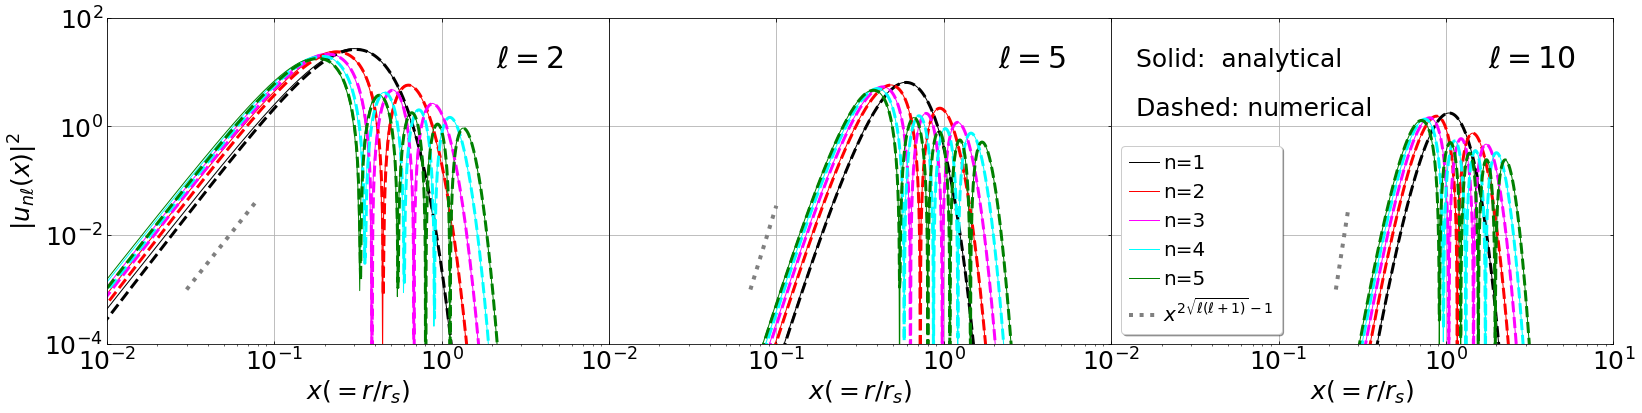

In [65]:
nmax = 200
xmin = 1.e-2
xmax = 10.
ymin   = 0.0001
ymax   = 1e2

xx = np.logspace(np.log10(xmin), np.log10(xmax), nmax)

plt.rcParams["font.size"] = 25
fig=plt.figure(figsize=(27,6))
gs = gridspec.GridSpec(1,3,wspace=0.0,hspace=0.0)


###################################### ell = 2  #############################################

ax = plt.subplot(gs[0,0])
ax.tick_params(direction='in',bottom=True,left=True,right=False,top=True)
ax.tick_params(labelbottom=True,labelleft=True,labelright=False,labeltop=False)
ax.set_xscale('log')
ax.set_yscale('log')


##### Analytical 
lw=1
xx = x1[0::nskip]
ax.plot(xx, (eigen_ell1[0]/norm_eigen1[0]/xx)**2, 'black', lw=lw, label='n=1')
ax.plot(xx, (eigen_ell1[1]/norm_eigen1[1]/xx)**2, 'r', lw=lw, label='n=2')
ax.plot(xx, (eigen_ell1[2]/norm_eigen1[2]/xx)**2, 'magenta', lw=lw, label='n=3')
ax.plot(xx, (eigen_ell1[3]/norm_eigen1[3]/xx)**2, 'cyan', lw=lw, label='n=4')
ax.plot(xx, (eigen_ell1[4]/norm_eigen1[4]/xx)**2, 'green', lw=lw, label='n=5')

##### Numerical
lw=3
saga_data = vecs_ell1
xx = x1[0::nskip]
ax.plot(xx, (np.transpose(saga_data)[0][0::nskip]/norm_num1[0]/xx)**2, "--", lw=lw, color='black')
ax.plot(xx, (np.transpose(saga_data)[1][0::nskip]/norm_num1[1]/xx)**2, "--", lw=lw, color='r')
ax.plot(xx, (np.transpose(saga_data)[2][0::nskip]/norm_num1[2]/xx)**2, "--", lw=lw, color='magenta')
ax.plot(xx, (np.transpose(saga_data)[3][0::nskip]/norm_num1[3]/xx)**2, "--", lw=lw, color='cyan')
ax.plot(xx, (np.transpose(saga_data)[4][0::nskip]/norm_num1[4]/xx)**2, "--", lw=lw, color='green')

### Asymptotic behavior at inner region 
xmin1 = 3.*xmin
xmax1 = 8.*xmin
slope = 2*np.sqrt(ell1*(ell1+1)) - 1.
yy    = np.logspace(np.log10(xmin1), np.log10(xmax1), 30)
asymptotic_power =  (yy/xmin1) ** slope
ax.plot(yy, 1e-3*asymptotic_power, ":", lw=4, color='gray', label="$x^{2\\sqrt{\\ell(\ell+1)}-1}$")

ax.text(10**(np.log10(xmin) + 0.775*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\ell=%2i$"%ell1, fontsize=30)
ax.set_xlabel('$x(=r/r_s)$')
#ax.set_ylabel('$|u_{n}(x)|^2/|u_{n}(0)|^2$')
ax.set_ylabel('$|u_{n\\ell}(x)|^2$')
ax.set_xlim(xmin, xmax-0.001)
ax.set_ylim(ymin, ymax)
ax.grid()
#ax.legend(shadow=True,loc='upper right',fontsize=18,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


###################################### ell = 5  #############################################

bx = plt.subplot(gs[0,1])
bx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
bx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)

bx.set_xscale('log')
bx.set_yscale('log')


##### Analytical 
lw=1
xx = x2[0::nskip]
bx.plot(xx, (eigen_ell2[0]/norm_eigen2[0]/xx)**2, 'black', lw=lw, label='n=1')
bx.plot(xx, (eigen_ell2[1]/norm_eigen2[1]/xx)**2, 'r', lw=lw, label='n=2')
bx.plot(xx, (eigen_ell2[2]/norm_eigen2[2]/xx)**2, 'magenta', lw=lw, label='n=3')
bx.plot(xx, (eigen_ell2[3]/norm_eigen2[3]/xx)**2, 'cyan', lw=lw, label='n=4')
bx.plot(xx, (eigen_ell2[4]/norm_eigen2[4]/xx)**2, 'green', lw=lw, label='n=5')

# ##### Numerical
lw=3
saga_data = vecs_ell2
xx = x2[0::nskip]
bx.plot(xx, (np.transpose(saga_data)[0][0::nskip]/norm_num2[0]/xx)**2, "--", lw=lw, color='black')
bx.plot(xx, (np.transpose(saga_data)[1][0::nskip]/norm_num2[1]/xx)**2, "--", lw=lw, color='r')
bx.plot(xx, (np.transpose(saga_data)[2][0::nskip]/norm_num2[2]/xx)**2, "--", lw=lw, color='magenta')
bx.plot(xx, (np.transpose(saga_data)[3][0::nskip]/norm_num2[3]/xx)**2, "--", lw=lw, color='cyan')
bx.plot(xx, (np.transpose(saga_data)[4][0::nskip]/norm_num2[4]/xx)**2, "--", lw=lw, color='green')

### Asymptotic behavior at inner region 
xmin1 = 7.*xmin
xmax1 = 10.*xmin
slope = 2*np.sqrt(ell2*(ell2+1)) - 1.
yy    = np.logspace(np.log10(xmin1), np.log10(xmax1), 30)
asymptotic_power =  (yy/xmin1) ** slope
bx.plot(yy, 1e-3*asymptotic_power, ":", lw=4, color='gray', label="$x^{2\\sqrt{\\ell(\ell+1)}-1}$")

bx.text(10**(np.log10(xmin) + 0.775*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\ell=%2i$"%ell2, fontsize=30)
bx.set_xlabel('$x(=r/r_s)$')
bx.set_xlim(xmin, xmax-0.001)
bx.set_ylim(ymin, ymax)
bx.grid()

###################################### ell = 10  #############################################

cx = plt.subplot(gs[0,2])
cx.tick_params(direction='in',bottom=True,left=False,right=True,top=True)
cx.tick_params(labelbottom=True,labelleft=False,labelright=False,labeltop=False)

cx.set_xscale('log')
cx.set_yscale('log')


##### Analytical 
lw=1
xx = x3[0::nskip]
cx.plot(xx, (eigen_ell3[0]/norm_eigen3[0]/xx)**2, 'black', lw=lw, label='n=1')
cx.plot(xx, (eigen_ell3[1]/norm_eigen3[1]/xx)**2, 'r', lw=lw, label='n=2')
cx.plot(xx, (eigen_ell3[2]/norm_eigen3[2]/xx)**2, 'magenta', lw=lw, label='n=3')
cx.plot(xx, (eigen_ell3[3]/norm_eigen3[3]/xx)**2, 'cyan', lw=lw, label='n=4')
cx.plot(xx, (eigen_ell3[4]/norm_eigen3[4]/xx)**2, 'green', lw=lw, label='n=5')

# ##### Numerical
lw=3
saga_data = vecs_ell3
xx = x3[0::nskip]
cx.plot(xx, (np.transpose(saga_data)[0][0::nskip]/norm_num3[0]/xx)**2, "--", lw=lw, color='black')
cx.plot(xx, (np.transpose(saga_data)[1][0::nskip]/norm_num3[1]/xx)**2, "--", lw=lw, color='r')
cx.plot(xx, (np.transpose(saga_data)[2][0::nskip]/norm_num3[2]/xx)**2, "--", lw=lw, color='magenta')
cx.plot(xx, (np.transpose(saga_data)[3][0::nskip]/norm_num3[3]/xx)**2, "--", lw=lw, color='cyan')
cx.plot(xx, (np.transpose(saga_data)[4][0::nskip]/norm_num3[4]/xx)**2, "--", lw=lw, color='green')

### Asymptotic behavior at inner region 
xmin1 = 22.*xmin
xmax1 = 26.*xmin
slope = 2*np.sqrt(ell3*(ell3+1)) - 1.
yy    = np.logspace(np.log10(xmin1), np.log10(xmax1), 30)
asymptotic_power =  (yy/xmin1) ** slope
cx.plot(yy, 1e-3*asymptotic_power, ":", lw=4, color='gray',label="$x^{2\\sqrt{\\ell(\ell+1)}-1}$")

cx.text(10**(np.log10(xmin) + 0.75*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "$\\ell=%2i$"%ell3, fontsize=30)
cx.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.85*(np.log10(ymax)-np.log10(ymin))), "Solid:  analytical", fontsize=25)
cx.text(10**(np.log10(xmin) + 0.05*(np.log10(xmax)- np.log10(xmin))), 10**(np.log10(ymin) + 0.7*(np.log10(ymax)-np.log10(ymin))), "Dashed: numerical ", fontsize=25)
cx.set_xlabel('$x(=r/r_s)$')
cx.set_xlim(xmin, xmax)
cx.set_ylim(ymin, ymax)
cx.grid()
cx.legend(shadow=True,loc='lower left',fontsize=20,handletextpad=0.2,handlelength= 1.5, borderaxespad=0.5)


plt.show()

# pp = PdfPages('/Users/ataruya/Files/Lin/work_space/FDM/draft/Figs/eigenfunctions_log_alpha1000_ell_2_5_10.pdf')
# pp.savefig(fig, bbox_inches='tight')
# pp.close()